# Visualizations of government indices, cases & deaths over time
Note the y-axis is between 0 and 1 for all variables (e.g. total cases, new cases, etc) for all countries and the world.
Therefore, the following figures ARE for seeing progression over time. They are not for comparing
values between countries or the world

# This notebook created stringency, health, econ_support, gov_resp csv files

In [1]:
# import dependencies
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)
import matplotlib.dates as mdates

import numpy as np
from statistics import mean

from sklearn.preprocessing import MinMaxScaler

%matplotlib notebook

In [2]:
# load files
merged_covid = "merged_covid_FINAL.csv"
canada_data = "canada.csv"
us_data = "us.csv"
world_data = "world.csv"

merged_covid = pd.read_csv(merged_covid)
canada = pd.read_csv(canada_data)
us = pd.read_csv(us_data)
world = pd.read_csv(world_data)

mobil = pd.read_csv("mobil_3mnth.csv")

In [3]:
merged_covid['date_updated'] = pd.to_datetime(merged_covid['date_updated'].astype(str), format='%Y-%m-%d')

merged_covid

,primary_key_reaction,date_updated,iso_code,continent,location,population,population_density,median_age,new_cases,percentage_of_Pop_New_Cases,...,primary_key_response,StringencyIndex_updated,percentage_change_stringency,StringencyLegacyIndex_updated,GovernmentResponseIndex_updated,percentage_change_GovernmentResponse,ContainmentHealthIndex_updated,percentage_change_ContainmentHealth,EconomicSupportIndex_updated,percentage_change_EconomicSupport
0,ABW2020-03-13,2020-03-13,ABW,North America,Aruba,106766.0,584.800,41.2,2.0,0.001873,...,ABW2020-03-13,0.00,0.000000,0.00,2.56,0.000000,3.03,0.000000,0.0,0.0
1,ABW2020-03-19,2020-03-19,ABW,North America,Aruba,106766.0,584.800,41.2,0.0,0.000000,...,ABW2020-03-19,33.33,0.000000,42.86,29.49,15.015601,34.85,15.016502,0.0,0.0
2,ABW2020-03-20,2020-03-20,ABW,North America,Aruba,106766.0,584.800,41.2,2.0,0.001873,...,ABW2020-03-20,33.33,0.000000,42.86,29.49,0.000000,34.85,0.000000,0.0,0.0
3,ABW2020-03-21,2020-03-21,ABW,North America,Aruba,106766.0,584.800,41.2,0.0,0.000000,...,ABW2020-03-21,44.44,33.333333,60.71,37.18,26.076636,43.94,26.083214,0.0,0.0
4,ABW2020-03-22,2020-03-22,ABW,North America,Aruba,106766.0,584.800,41.2,0.0,0.000000,...,ABW2020-03-22,44.44,0.000000,60.71,37.18,0.000000,43.94,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32272,ZWE2020-08-27,2020-08-27,ZWE,Africa,Zimbabwe,14862927.0,42.729,19.6,55.0,0.000370,...,ZWE2020-08-27,80.56,0.000000,88.10,66.03,0.000000,73.48,0.000000,25.0,0.0
32273,ZWE2020-08-28,2020-08-28,ZWE,Africa,Zimbabwe,14862927.0,42.729,19.6,41.0,0.000276,...,ZWE2020-08-28,80.56,0.000000,88.10,66.03,0.000000,73.48,0.000000,25.0,0.0
32274,ZWE2020-08-29,2020-08-29,ZWE,Africa,Zimbabwe,14862927.0,42.729,19.6,96.0,0.000646,...,ZWE2020-08-29,80.56,0.000000,88.10,66.03,0.000000,73.48,0.000000,25.0,0.0
32275,ZWE2020-08-30,2020-08-30,ZWE,Africa,Zimbabwe,14862927.0,42.729,19.6,18.0,0.000121,...,ZWE2020-08-30,80.56,0.000000,88.10,66.03,0.000000,73.48,0.000000,25.0,0.0


# Create df of ISO codes

In [4]:
# get series of iso codes
iso_grp = merged_covid.groupby(by=['location','iso_code']).sum()
iso_grp = iso_grp.reset_index()
iso_df = iso_grp[['location','iso_code']]
iso_df.to_csv("iso_codes.csv")

In [5]:
# make china df
china = merged_covid.loc[merged_covid['location'] == "China"]
china

china.set_index("date_updated", inplace=True)
china

,primary_key_reaction,iso_code,continent,location,population,population_density,median_age,new_cases,percentage_of_Pop_New_Cases,new_deaths,...,primary_key_response,StringencyIndex_updated,percentage_change_stringency,StringencyLegacyIndex_updated,GovernmentResponseIndex_updated,percentage_change_GovernmentResponse,ContainmentHealthIndex_updated,percentage_change_ContainmentHealth,EconomicSupportIndex_updated,percentage_change_EconomicSupport
date_updated,,,,,,,,,,,,,,,,,,,,,
2020-01-01,CHN2020-01-01,CHN,Asia,China,1.439324e+09,147.674,38.7,0.0,0.000000,0.0,...,CHN2020-01-01,0.00,0.0,0.00,6.41,0.000000,7.58,0.000000,0.0,0.0
2020-01-02,CHN2020-01-02,CHN,Asia,China,1.439324e+09,147.674,38.7,0.0,0.000000,0.0,...,CHN2020-01-02,0.00,0.0,0.00,6.41,0.000000,7.58,0.000000,0.0,0.0
2020-01-03,CHN2020-01-03,CHN,Asia,China,1.439324e+09,147.674,38.7,17.0,0.000001,0.0,...,CHN2020-01-03,0.00,0.0,0.00,6.41,0.000000,7.58,0.000000,0.0,0.0
2020-01-04,CHN2020-01-04,CHN,Asia,China,1.439324e+09,147.674,38.7,0.0,0.000000,0.0,...,CHN2020-01-04,0.00,0.0,0.00,6.41,0.000000,7.58,0.000000,0.0,0.0
2020-01-05,CHN2020-01-05,CHN,Asia,China,1.439324e+09,147.674,38.7,15.0,0.000001,0.0,...,CHN2020-01-05,2.78,0.0,4.76,12.18,90.015601,14.39,89.841689,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-27,CHN2020-08-27,CHN,Asia,China,1.439324e+09,147.674,38.7,32.0,0.000002,1.0,...,CHN2020-08-27,81.94,0.0,78.10,77.88,0.000000,85.23,0.000000,37.5,0.0
2020-08-28,CHN2020-08-28,CHN,Asia,China,1.439324e+09,147.674,38.7,30.0,0.000002,2.0,...,CHN2020-08-28,81.94,0.0,78.10,77.88,0.000000,85.23,0.000000,37.5,0.0
2020-08-29,CHN2020-08-29,CHN,Asia,China,1.439324e+09,147.674,38.7,22.0,0.000002,3.0,...,CHN2020-08-29,81.94,0.0,78.10,77.88,0.000000,85.23,0.000000,37.5,0.0


In [6]:
# preview canada df
canada

canada.set_index('date_updated', inplace=True)
canada

,primary_key_reaction,iso_code,continent,location,population,population_density,median_age,new_cases,percentage_of_Pop_New_Cases,new_deaths,...,primary_key_response,StringencyIndex_updated,percentage_change_stringency,StringencyLegacyIndex_updated,GovernmentResponseIndex_updated,percentage_change_GovernmentResponse,ContainmentHealthIndex_updated,percentage_change_ContainmentHealth,EconomicSupportIndex_updated,percentage_change_EconomicSupport
date_updated,,,,,,,,,,,,,,,,,,,,,
2020-01-01,CAN2020-01-01,CAN,North America,Canada,37742157.0,4.037,41.4,0.0,0.000000,0.0,...,CAN2020-01-01,0.00,0.0,0.00,3.85,0.0,4.55,0.0,0.0,0.0
2020-01-02,CAN2020-01-02,CAN,North America,Canada,37742157.0,4.037,41.4,0.0,0.000000,0.0,...,CAN2020-01-02,0.00,0.0,0.00,3.85,0.0,4.55,0.0,0.0,0.0
2020-01-03,CAN2020-01-03,CAN,North America,Canada,37742157.0,4.037,41.4,0.0,0.000000,0.0,...,CAN2020-01-03,0.00,0.0,0.00,3.85,0.0,4.55,0.0,0.0,0.0
2020-01-04,CAN2020-01-04,CAN,North America,Canada,37742157.0,4.037,41.4,0.0,0.000000,0.0,...,CAN2020-01-04,0.00,0.0,0.00,3.85,0.0,4.55,0.0,0.0,0.0
2020-01-05,CAN2020-01-05,CAN,North America,Canada,37742157.0,4.037,41.4,0.0,0.000000,0.0,...,CAN2020-01-05,0.00,0.0,0.00,3.85,0.0,4.55,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-27,CAN2020-08-27,CAN,North America,Canada,37742157.0,4.037,41.4,448.0,0.001187,4.0,...,CAN2020-08-27,61.57,0.0,59.05,69.55,0.0,68.56,0.0,75.0,0.0
2020-08-28,CAN2020-08-28,CAN,North America,Canada,37742157.0,4.037,41.4,431.0,0.001142,8.0,...,CAN2020-08-28,61.57,0.0,59.05,69.55,0.0,68.56,0.0,75.0,0.0
2020-08-29,CAN2020-08-29,CAN,North America,Canada,37742157.0,4.037,41.4,510.0,0.001351,6.0,...,CAN2020-08-29,61.57,0.0,59.05,69.55,0.0,68.56,0.0,75.0,0.0


In [7]:
# preview us df
us

us.set_index('date_updated', inplace=True)
us

,primary_key_reaction,iso_code,continent,location,population,population_density,median_age,new_cases,percentage_of_Pop_New_Cases,new_deaths,...,primary_key_response,StringencyIndex_updated,percentage_change_stringency,StringencyLegacyIndex_updated,GovernmentResponseIndex_updated,percentage_change_GovernmentResponse,ContainmentHealthIndex_updated,percentage_change_ContainmentHealth,EconomicSupportIndex_updated,percentage_change_EconomicSupport
date_updated,,,,,,,,,,,,,,,,,,,,,
2020-01-01,USA2020-01-01,USA,North America,United States,331002647.0,35.608,38.3,0.0,0.000000,0.0,...,USA2020-01-01,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0
2020-01-02,USA2020-01-02,USA,North America,United States,331002647.0,35.608,38.3,0.0,0.000000,0.0,...,USA2020-01-02,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0
2020-01-03,USA2020-01-03,USA,North America,United States,331002647.0,35.608,38.3,0.0,0.000000,0.0,...,USA2020-01-03,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0
2020-01-04,USA2020-01-04,USA,North America,United States,331002647.0,35.608,38.3,0.0,0.000000,0.0,...,USA2020-01-04,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0
2020-01-05,USA2020-01-05,USA,North America,United States,331002647.0,35.608,38.3,0.0,0.000000,0.0,...,USA2020-01-05,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-27,USA2020-08-27,USA,North America,United States,331002647.0,35.608,38.3,42848.0,0.012945,1228.0,...,USA2020-08-27,67.13,0.0,68.57,67.63,0.0,68.56,0.0,62.5,0.0
2020-08-28,USA2020-08-28,USA,North America,United States,331002647.0,35.608,38.3,45909.0,0.013870,1110.0,...,USA2020-08-28,67.13,0.0,68.57,67.63,0.0,68.56,0.0,62.5,0.0
2020-08-29,USA2020-08-29,USA,North America,United States,331002647.0,35.608,38.3,49654.0,0.015001,949.0,...,USA2020-08-29,67.13,0.0,68.57,67.63,0.0,68.56,0.0,62.5,0.0


In [8]:
# preview world df
world

world.set_index("date_updated", inplace=True)
world

,new_cases,new_deaths,new_tests,total_cases_updated,total_deaths_updated,total_tests_updated,StringencyIndex_updated,StringencyLegacyIndex_updated,GovernmentResponseIndex_updated,ContainmentHealthIndex_updated,EconomicSupportIndex_updated
date_updated,,,,,,,,,,,
2020-01-01,0.0,0.0,4.0,27.0,0.0,4.0,0.000000,0.000000,0.294262,0.198852,0.819672
2020-01-02,0.0,0.0,16.0,27.0,0.0,20.0,0.227705,0.292787,0.493934,0.434754,0.819672
2020-01-03,17.0,0.0,18.0,44.0,0.0,38.0,0.318852,0.448852,0.557049,0.509344,0.819672
2020-01-04,0.0,0.0,6.0,44.0,0.0,44.0,0.318852,0.448852,0.557049,0.509344,0.819672
2020-01-05,15.0,0.0,14.0,59.0,0.0,58.0,0.364426,0.526885,0.651639,0.620984,0.819672
...,...,...,...,...,...,...,...,...,...,...,...
2020-08-27,275851.0,6281.0,3006239.0,24094533.0,823332.0,298974665.0,56.879325,63.713006,58.561411,59.588466,52.914110
2020-08-28,282431.0,6058.0,2717215.0,24376964.0,829390.0,301710228.0,56.879325,63.713006,58.561411,59.588466,52.914110
2020-08-29,275415.0,5444.0,2224706.0,24652379.0,834834.0,303939387.0,56.879325,63.713006,58.561411,59.588466,52.914110


# join dfs

In [9]:
chinCan = china.join(canada, how="inner", lsuffix="_CHIN", rsuffix="_CAN")
chinCan

,primary_key_reaction_CHIN,iso_code_CHIN,continent_CHIN,location_CHIN,population_CHIN,population_density_CHIN,median_age_CHIN,new_cases_CHIN,percentage_of_Pop_New_Cases_CHIN,new_deaths_CHIN,...,primary_key_response_CAN,StringencyIndex_updated_CAN,percentage_change_stringency_CAN,StringencyLegacyIndex_updated_CAN,GovernmentResponseIndex_updated_CAN,percentage_change_GovernmentResponse_CAN,ContainmentHealthIndex_updated_CAN,percentage_change_ContainmentHealth_CAN,EconomicSupportIndex_updated_CAN,percentage_change_EconomicSupport_CAN
date_updated,,,,,,,,,,,,,,,,,,,,,
2020-01-01,CHN2020-01-01,CHN,Asia,China,1.439324e+09,147.674,38.7,0.0,0.000000,0.0,...,CAN2020-01-01,0.00,0.0,0.00,3.85,0.0,4.55,0.0,0.0,0.0
2020-01-02,CHN2020-01-02,CHN,Asia,China,1.439324e+09,147.674,38.7,0.0,0.000000,0.0,...,CAN2020-01-02,0.00,0.0,0.00,3.85,0.0,4.55,0.0,0.0,0.0
2020-01-03,CHN2020-01-03,CHN,Asia,China,1.439324e+09,147.674,38.7,17.0,0.000001,0.0,...,CAN2020-01-03,0.00,0.0,0.00,3.85,0.0,4.55,0.0,0.0,0.0
2020-01-04,CHN2020-01-04,CHN,Asia,China,1.439324e+09,147.674,38.7,0.0,0.000000,0.0,...,CAN2020-01-04,0.00,0.0,0.00,3.85,0.0,4.55,0.0,0.0,0.0
2020-01-05,CHN2020-01-05,CHN,Asia,China,1.439324e+09,147.674,38.7,15.0,0.000001,0.0,...,CAN2020-01-05,0.00,0.0,0.00,3.85,0.0,4.55,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-27,CHN2020-08-27,CHN,Asia,China,1.439324e+09,147.674,38.7,32.0,0.000002,1.0,...,CAN2020-08-27,61.57,0.0,59.05,69.55,0.0,68.56,0.0,75.0,0.0
2020-08-28,CHN2020-08-28,CHN,Asia,China,1.439324e+09,147.674,38.7,30.0,0.000002,2.0,...,CAN2020-08-28,61.57,0.0,59.05,69.55,0.0,68.56,0.0,75.0,0.0
2020-08-29,CHN2020-08-29,CHN,Asia,China,1.439324e+09,147.674,38.7,22.0,0.000002,3.0,...,CAN2020-08-29,61.57,0.0,59.05,69.55,0.0,68.56,0.0,75.0,0.0


In [10]:
chinCanUS = chinCan.join(us, how="inner", lsuffix="_CAN", rsuffix="_US")
chinCanUS

,primary_key_reaction_CHIN,iso_code_CHIN,continent_CHIN,location_CHIN,population_CHIN,population_density_CHIN,median_age_CHIN,new_cases_CHIN,percentage_of_Pop_New_Cases_CHIN,new_deaths_CHIN,...,primary_key_response,StringencyIndex_updated,percentage_change_stringency,StringencyLegacyIndex_updated,GovernmentResponseIndex_updated,percentage_change_GovernmentResponse,ContainmentHealthIndex_updated,percentage_change_ContainmentHealth,EconomicSupportIndex_updated,percentage_change_EconomicSupport
date_updated,,,,,,,,,,,,,,,,,,,,,
2020-01-01,CHN2020-01-01,CHN,Asia,China,1.439324e+09,147.674,38.7,0.0,0.000000,0.0,...,USA2020-01-01,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0
2020-01-02,CHN2020-01-02,CHN,Asia,China,1.439324e+09,147.674,38.7,0.0,0.000000,0.0,...,USA2020-01-02,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0
2020-01-03,CHN2020-01-03,CHN,Asia,China,1.439324e+09,147.674,38.7,17.0,0.000001,0.0,...,USA2020-01-03,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0
2020-01-04,CHN2020-01-04,CHN,Asia,China,1.439324e+09,147.674,38.7,0.0,0.000000,0.0,...,USA2020-01-04,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0
2020-01-05,CHN2020-01-05,CHN,Asia,China,1.439324e+09,147.674,38.7,15.0,0.000001,0.0,...,USA2020-01-05,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-27,CHN2020-08-27,CHN,Asia,China,1.439324e+09,147.674,38.7,32.0,0.000002,1.0,...,USA2020-08-27,67.13,0.0,68.57,67.63,0.0,68.56,0.0,62.5,0.0
2020-08-28,CHN2020-08-28,CHN,Asia,China,1.439324e+09,147.674,38.7,30.0,0.000002,2.0,...,USA2020-08-28,67.13,0.0,68.57,67.63,0.0,68.56,0.0,62.5,0.0
2020-08-29,CHN2020-08-29,CHN,Asia,China,1.439324e+09,147.674,38.7,22.0,0.000002,3.0,...,USA2020-08-29,67.13,0.0,68.57,67.63,0.0,68.56,0.0,62.5,0.0


In [11]:
chinCanUSWorld = chinCanUS.join(world, how="inner", lsuffix="_US", rsuffix="_W")

chinCanUSWorld.drop(columns=['iso_code_CHIN', 'continent_CHIN', 'location_CHIN', 'iso_code_CAN', 'continent_CAN',
       'location_CAN', 'iso_code', 'continent', 'location'], inplace=True)
list(chinCanUSWorld.columns) 

['primary_key_reaction_CHIN',
 'population_CHIN',
 'population_density_CHIN',
 'median_age_CHIN',
 'new_cases_CHIN',
 'percentage_of_Pop_New_Cases_CHIN',
 'new_deaths_CHIN',
 'percentage_of_Pop_New_Deaths_CHIN',
 'new_tests_CHIN',
 'percentage_of_Pop_New_Tests_CHIN',
 'total_cases_updated_CHIN',
 'percentage_of_Pop_Total_Cases_CHIN',
 'total_deaths_updated_CHIN',
 'percentage_of_Pop_Total_Deaths_CHIN',
 'total_tests_updated_CHIN',
 'percentage_of_Pop_Total_Tests_CHIN',
 'primary_key_response_CHIN',
 'StringencyIndex_updated_CHIN',
 'percentage_change_stringency_CHIN',
 'StringencyLegacyIndex_updated_CHIN',
 'GovernmentResponseIndex_updated_CHIN',
 'percentage_change_GovernmentResponse_CHIN',
 'ContainmentHealthIndex_updated_CHIN',
 'percentage_change_ContainmentHealth_CHIN',
 'EconomicSupportIndex_updated_CHIN',
 'percentage_change_EconomicSupport_CHIN',
 'primary_key_reaction_CAN',
 'population_CAN',
 'population_density_CAN',
 'median_age_CAN',
 'new_cases_CAN',
 'percentage_of_Pop_N

# Scale China

In [12]:
# scaler
scaler = MinMaxScaler()

# trial before function creation
new_cases_CHIN = chinCanUSWorld['new_cases_CHIN']

new_cases_CHIN = np.asarray(new_cases_CHIN)
new_cases_CHIN = new_cases_CHIN.reshape(-1,1)
new_cases_CHIN = scaler.fit_transform(new_cases_CHIN)

chinCanUSWorld['T_new_cases_CHIN'] = new_cases_CHIN
chinCanUSWorld.drop(columns=["new_cases_CHIN"], inplace=True)
chinCanUSWorld

,primary_key_reaction_CHIN,population_CHIN,population_density_CHIN,median_age_CHIN,percentage_of_Pop_New_Cases_CHIN,new_deaths_CHIN,percentage_of_Pop_New_Deaths_CHIN,new_tests_CHIN,percentage_of_Pop_New_Tests_CHIN,total_cases_updated_CHIN,...,new_tests_W,total_cases_updated_W,total_deaths_updated_W,total_tests_updated_W,StringencyIndex_updated_W,StringencyLegacyIndex_updated_W,GovernmentResponseIndex_updated_W,ContainmentHealthIndex_updated_W,EconomicSupportIndex_updated_W,T_new_cases_CHIN
date_updated,,,,,,,,,,,,,,,,,,,,,
2020-01-01,CHN2020-01-01,1.439324e+09,147.674,38.7,0.000000,0.0,0.000000e+00,0.0,0.0,27.0,...,4.0,27.0,0.0,4.0,0.000000,0.000000,0.294262,0.198852,0.819672,0.000000
2020-01-02,CHN2020-01-02,1.439324e+09,147.674,38.7,0.000000,0.0,0.000000e+00,0.0,0.0,27.0,...,16.0,27.0,0.0,20.0,0.227705,0.292787,0.493934,0.434754,0.819672,0.000000
2020-01-03,CHN2020-01-03,1.439324e+09,147.674,38.7,0.000001,0.0,0.000000e+00,0.0,0.0,44.0,...,18.0,44.0,0.0,38.0,0.318852,0.448852,0.557049,0.509344,0.819672,0.001123
2020-01-04,CHN2020-01-04,1.439324e+09,147.674,38.7,0.000000,0.0,0.000000e+00,0.0,0.0,44.0,...,6.0,44.0,0.0,44.0,0.318852,0.448852,0.557049,0.509344,0.819672,0.000000
2020-01-05,CHN2020-01-05,1.439324e+09,147.674,38.7,0.000001,0.0,0.000000e+00,0.0,0.0,59.0,...,14.0,59.0,0.0,58.0,0.364426,0.526885,0.651639,0.620984,0.819672,0.000991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-27,CHN2020-08-27,1.439324e+09,147.674,38.7,0.000002,1.0,6.947707e-10,0.0,0.0,89784.0,...,3006239.0,24094533.0,823332.0,298974665.0,56.879325,63.713006,58.561411,59.588466,52.914110,0.002113
2020-08-28,CHN2020-08-28,1.439324e+09,147.674,38.7,0.000002,2.0,1.389541e-09,0.0,0.0,89814.0,...,2717215.0,24376964.0,829390.0,301710228.0,56.879325,63.713006,58.561411,59.588466,52.914110,0.001981
2020-08-29,CHN2020-08-29,1.439324e+09,147.674,38.7,0.000002,3.0,2.084312e-09,0.0,0.0,89836.0,...,2224706.0,24652379.0,834834.0,303939387.0,56.879325,63.713006,58.561411,59.588466,52.914110,0.001453


In [13]:
# function that scales each column, attaches new col, drops old col
def scale(col):
    col = chinCanUSWorld[col]
    col = np.asarray(col)
    col = col.reshape(-1,1)
    col = scaler.fit_transform(col)
    return col

T_new_deaths_CHIN = scale('new_deaths_CHIN')
T_new_tests_CHIN = scale('new_tests_CHIN')
T_total_cases_updated_CHIN = scale('total_cases_updated_CHIN')
T_total_deaths_updated_CHIN = scale('total_deaths_updated_CHIN')
T_total_tests_updated_CHIN = scale('total_tests_updated_CHIN')

chinCanUSWorld['T_new_deaths_CHIN'] = T_new_deaths_CHIN
chinCanUSWorld['T_new_tests_CHIN'] = T_new_tests_CHIN
chinCanUSWorld['T_total_cases_updated_CHIN'] = T_total_cases_updated_CHIN
chinCanUSWorld['T_total_deaths_updated_CHIN'] = T_total_deaths_updated_CHIN
chinCanUSWorld['T_total_tests_updated_CHIN'] = T_total_tests_updated_CHIN

chinCanUSWorld.drop(columns=["new_deaths_CHIN",'new_tests_CHIN','total_cases_updated_CHIN','total_deaths_updated_CHIN','total_tests_updated_CHIN'], inplace=True)
chinCanUSWorld.columns

Index(['primary_key_reaction_CHIN', 'population_CHIN',
       'population_density_CHIN', 'median_age_CHIN',
       'percentage_of_Pop_New_Cases_CHIN', 'percentage_of_Pop_New_Deaths_CHIN',
       'percentage_of_Pop_New_Tests_CHIN',
       'percentage_of_Pop_Total_Cases_CHIN',
       'percentage_of_Pop_Total_Deaths_CHIN',
       'percentage_of_Pop_Total_Tests_CHIN', 'primary_key_response_CHIN',
       'StringencyIndex_updated_CHIN', 'percentage_change_stringency_CHIN',
       'StringencyLegacyIndex_updated_CHIN',
       'GovernmentResponseIndex_updated_CHIN',
       'percentage_change_GovernmentResponse_CHIN',
       'ContainmentHealthIndex_updated_CHIN',
       'percentage_change_ContainmentHealth_CHIN',
       'EconomicSupportIndex_updated_CHIN',
       'percentage_change_EconomicSupport_CHIN', 'primary_key_reaction_CAN',
       'population_CAN', 'population_density_CAN', 'median_age_CAN',
       'new_cases_CAN', 'percentage_of_Pop_New_Cases_CAN', 'new_deaths_CAN',
       'percentage_o

# Scale Canada

In [14]:
T_new_cases_CAN = scale('new_cases_CAN')
T_new_deaths_CAN = scale('new_deaths_CAN')
T_new_tests_CAN = scale('new_tests_CAN')
T_total_cases_updated_CAN = scale('total_cases_updated_CAN')
T_total_deaths_updated_CAN = scale('total_deaths_updated_CAN')
T_total_tests_updated_CAN = scale('total_tests_updated_CAN')

chinCanUSWorld['T_new_cases_CAN'] = T_new_cases_CAN
chinCanUSWorld['T_new_deaths_CAN'] = T_new_deaths_CAN
chinCanUSWorld['T_new_tests_CAN'] = T_new_tests_CAN
chinCanUSWorld['T_total_cases_updated_CAN'] = T_total_cases_updated_CAN
chinCanUSWorld['T_total_deaths_updated_CAN'] = T_total_deaths_updated_CAN
chinCanUSWorld['T_total_tests_updated_CAN'] = T_total_tests_updated_CAN

chinCanUSWorld.drop(columns=['new_cases_CAN', 'new_deaths_CAN','new_tests_CAN','total_cases_updated_CAN','total_deaths_updated_CAN','total_tests_updated_CAN'], inplace=True)
list(chinCanUSWorld.columns)

['primary_key_reaction_CHIN',
 'population_CHIN',
 'population_density_CHIN',
 'median_age_CHIN',
 'percentage_of_Pop_New_Cases_CHIN',
 'percentage_of_Pop_New_Deaths_CHIN',
 'percentage_of_Pop_New_Tests_CHIN',
 'percentage_of_Pop_Total_Cases_CHIN',
 'percentage_of_Pop_Total_Deaths_CHIN',
 'percentage_of_Pop_Total_Tests_CHIN',
 'primary_key_response_CHIN',
 'StringencyIndex_updated_CHIN',
 'percentage_change_stringency_CHIN',
 'StringencyLegacyIndex_updated_CHIN',
 'GovernmentResponseIndex_updated_CHIN',
 'percentage_change_GovernmentResponse_CHIN',
 'ContainmentHealthIndex_updated_CHIN',
 'percentage_change_ContainmentHealth_CHIN',
 'EconomicSupportIndex_updated_CHIN',
 'percentage_change_EconomicSupport_CHIN',
 'primary_key_reaction_CAN',
 'population_CAN',
 'population_density_CAN',
 'median_age_CAN',
 'percentage_of_Pop_New_Cases_CAN',
 'percentage_of_Pop_New_Deaths_CAN',
 'percentage_of_Pop_New_Tests_CAN',
 'percentage_of_Pop_Total_Cases_CAN',
 'percentage_of_Pop_Total_Deaths_CAN',

# Scale US

In [15]:
T_new_cases_US = scale('new_cases_US')
T_new_deaths_US = scale('new_deaths_US')
T_new_tests_US = scale('new_tests_US')
T_total_cases_updated_US = scale('total_cases_updated_US')
T_total_deaths_updated_US = scale('total_deaths_updated_US')
T_total_tests_updated_US = scale('total_tests_updated_US')

chinCanUSWorld['T_new_cases_US'] = T_new_cases_US
chinCanUSWorld['T_new_deaths_US'] = T_new_deaths_US
chinCanUSWorld['T_new_tests_US'] = T_new_tests_US
chinCanUSWorld['T_total_cases_updated_US'] = T_total_cases_updated_US
chinCanUSWorld['T_total_deaths_updated_US'] = T_total_deaths_updated_US
chinCanUSWorld['T_total_tests_updated_US'] = T_total_tests_updated_US

chinCanUSWorld.drop(columns=['new_cases_US', 'new_deaths_US','new_tests_US','total_cases_updated_US','total_deaths_updated_US','total_tests_updated_US'], inplace=True)
list(chinCanUSWorld.columns)

['primary_key_reaction_CHIN',
 'population_CHIN',
 'population_density_CHIN',
 'median_age_CHIN',
 'percentage_of_Pop_New_Cases_CHIN',
 'percentage_of_Pop_New_Deaths_CHIN',
 'percentage_of_Pop_New_Tests_CHIN',
 'percentage_of_Pop_Total_Cases_CHIN',
 'percentage_of_Pop_Total_Deaths_CHIN',
 'percentage_of_Pop_Total_Tests_CHIN',
 'primary_key_response_CHIN',
 'StringencyIndex_updated_CHIN',
 'percentage_change_stringency_CHIN',
 'StringencyLegacyIndex_updated_CHIN',
 'GovernmentResponseIndex_updated_CHIN',
 'percentage_change_GovernmentResponse_CHIN',
 'ContainmentHealthIndex_updated_CHIN',
 'percentage_change_ContainmentHealth_CHIN',
 'EconomicSupportIndex_updated_CHIN',
 'percentage_change_EconomicSupport_CHIN',
 'primary_key_reaction_CAN',
 'population_CAN',
 'population_density_CAN',
 'median_age_CAN',
 'percentage_of_Pop_New_Cases_CAN',
 'percentage_of_Pop_New_Deaths_CAN',
 'percentage_of_Pop_New_Tests_CAN',
 'percentage_of_Pop_Total_Cases_CAN',
 'percentage_of_Pop_Total_Deaths_CAN',

# Scale World

In [16]:
T_new_cases_W = scale('new_cases_W')
T_new_deaths_W = scale('new_deaths_W')
T_new_tests_W = scale('new_tests_W')
T_total_cases_updated_W = scale('total_cases_updated_W')
T_total_deaths_updated_W = scale('total_deaths_updated_W')
T_total_tests_updated_W = scale('total_tests_updated_W')

chinCanUSWorld['T_new_cases_W'] = T_new_cases_W
chinCanUSWorld['T_new_deaths_W'] = T_new_deaths_W
chinCanUSWorld['T_new_tests_W'] = T_new_tests_W
chinCanUSWorld['T_total_cases_updated_W'] = T_total_cases_updated_W
chinCanUSWorld['T_total_deaths_updated_W'] = T_total_deaths_updated_W
chinCanUSWorld['T_total_tests_updated_W'] = T_total_tests_updated_W

chinCanUSWorld.drop(columns=['new_cases_W', 'new_deaths_W','new_tests_W','total_cases_updated_W','total_deaths_updated_W','total_tests_updated_W'], inplace=True)
list(chinCanUSWorld.columns)
display(chinCanUSWorld)
chinCanUSWorld.reset_index(inplace=True)
chinCanUSWorld

,primary_key_reaction_CHIN,population_CHIN,population_density_CHIN,median_age_CHIN,percentage_of_Pop_New_Cases_CHIN,percentage_of_Pop_New_Deaths_CHIN,percentage_of_Pop_New_Tests_CHIN,percentage_of_Pop_Total_Cases_CHIN,percentage_of_Pop_Total_Deaths_CHIN,percentage_of_Pop_Total_Tests_CHIN,...,T_new_tests_US,T_total_cases_updated_US,T_total_deaths_updated_US,T_total_tests_updated_US,T_new_cases_W,T_new_deaths_W,T_new_tests_W,T_total_cases_updated_W,T_total_deaths_updated_W,T_total_tests_updated_W
date_updated,,,,,,,,,,,,,,,,,,,,,
2020-01-01,CHN2020-01-01,1.439324e+09,147.674,38.7,0.000000,0.000000e+00,0.0,0.000002,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
2020-01-02,CHN2020-01-02,1.439324e+09,147.674,38.7,0.000000,0.000000e+00,0.0,0.000002,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.413690e-06,0.000000e+00,0.000000,5.229945e-08
2020-01-03,CHN2020-01-03,1.439324e+09,147.674,38.7,0.000001,0.000000e+00,0.0,0.000003,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000057,0.000000,3.982638e-06,6.821754e-07,0.000000,1.111363e-07
2020-01-04,CHN2020-01-04,1.439324e+09,147.674,38.7,0.000000,0.000000e+00,0.0,0.000003,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.689483e-07,6.821754e-07,0.000000,1.307486e-07
2020-01-05,CHN2020-01-05,1.439324e+09,147.674,38.7,0.000001,0.000000e+00,0.0,0.000004,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000050,0.000000,2.844741e-06,1.284095e-06,0.000000,1.765107e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-27,CHN2020-08-27,1.439324e+09,147.674,38.7,0.000002,6.947707e-10,0.0,0.006238,0.000327,0.0,...,0.526858,0.970772,0.981674,0.993756,0.928197,0.600478,8.551961e-01,9.668635e-01,0.979561,9.772632e-01
2020-08-28,CHN2020-08-28,1.439324e+09,147.674,38.7,0.000002,1.389541e-09,0.0,0.006240,0.000328,0.0,...,0.438720,0.978427,0.987737,1.000000,0.950338,0.579159,7.729763e-01,9.781969e-01,0.986769,9.862050e-01
2020-08-29,CHN2020-08-29,1.439324e+09,147.674,38.7,0.000002,2.084312e-09,0.0,0.006242,0.000328,0.0,...,0.000000,0.986706,0.992921,1.000000,0.926730,0.520459,6.328702e-01,9.892487e-01,0.993246,9.934915e-01


,date_updated,primary_key_reaction_CHIN,population_CHIN,population_density_CHIN,median_age_CHIN,percentage_of_Pop_New_Cases_CHIN,percentage_of_Pop_New_Deaths_CHIN,percentage_of_Pop_New_Tests_CHIN,percentage_of_Pop_Total_Cases_CHIN,percentage_of_Pop_Total_Deaths_CHIN,...,T_new_tests_US,T_total_cases_updated_US,T_total_deaths_updated_US,T_total_tests_updated_US,T_new_cases_W,T_new_deaths_W,T_new_tests_W,T_total_cases_updated_W,T_total_deaths_updated_W,T_total_tests_updated_W
0,2020-01-01,CHN2020-01-01,1.439324e+09,147.674,38.7,0.000000,0.000000e+00,0.0,0.000002,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
1,2020-01-02,CHN2020-01-02,1.439324e+09,147.674,38.7,0.000000,0.000000e+00,0.0,0.000002,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.413690e-06,0.000000e+00,0.000000,5.229945e-08
2,2020-01-03,CHN2020-01-03,1.439324e+09,147.674,38.7,0.000001,0.000000e+00,0.0,0.000003,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000057,0.000000,3.982638e-06,6.821754e-07,0.000000,1.111363e-07
3,2020-01-04,CHN2020-01-04,1.439324e+09,147.674,38.7,0.000000,0.000000e+00,0.0,0.000003,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.689483e-07,6.821754e-07,0.000000,1.307486e-07
4,2020-01-05,CHN2020-01-05,1.439324e+09,147.674,38.7,0.000001,0.000000e+00,0.0,0.000004,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000050,0.000000,2.844741e-06,1.284095e-06,0.000000,1.765107e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,2020-08-27,CHN2020-08-27,1.439324e+09,147.674,38.7,0.000002,6.947707e-10,0.0,0.006238,0.000327,...,0.526858,0.970772,0.981674,0.993756,0.928197,0.600478,8.551961e-01,9.668635e-01,0.979561,9.772632e-01
240,2020-08-28,CHN2020-08-28,1.439324e+09,147.674,38.7,0.000002,1.389541e-09,0.0,0.006240,0.000328,...,0.438720,0.978427,0.987737,1.000000,0.950338,0.579159,7.729763e-01,9.781969e-01,0.986769,9.862050e-01
241,2020-08-29,CHN2020-08-29,1.439324e+09,147.674,38.7,0.000002,2.084312e-09,0.0,0.006242,0.000328,...,0.000000,0.986706,0.992921,1.000000,0.926730,0.520459,6.328702e-01,9.892487e-01,0.993246,9.934915e-01
242,2020-08-30,CHN2020-08-30,1.439324e+09,147.674,38.7,0.000002,2.084312e-09,0.0,0.006243,0.000328,...,0.000000,0.994067,0.998416,1.000000,0.901528,0.542734,4.978952e-01,1.000000e+00,1.000000,1.000000e+00


In [17]:
chinCanUSWorld['date_updated'] = pd.to_datetime(chinCanUSWorld['date_updated'].astype(str), format='%Y-%m-%d')
chinCanUSWorld.dtypes

date_updated                 datetime64[ns]
primary_key_reaction_CHIN            object
population_CHIN                     float64
population_density_CHIN             float64
median_age_CHIN                     float64
                                  ...      
T_new_deaths_W                      float64
T_new_tests_W                       float64
T_total_cases_updated_W             float64
T_total_deaths_updated_W            float64
T_total_tests_updated_W             float64
Length: 90, dtype: object

# Graphs

<IPython.core.display.Javascript object>


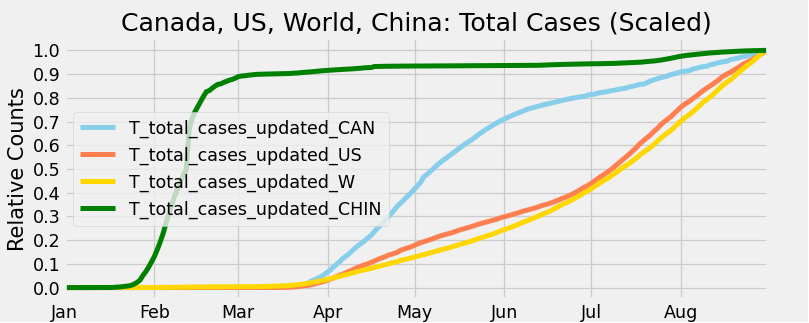

In [18]:
# total cases
T_TotCase_df = chinCanUSWorld[['date_updated','T_total_cases_updated_CAN','T_total_cases_updated_US','T_total_cases_updated_W','T_total_cases_updated_CHIN']]
T_TotCase_df.set_index(['date_updated'], inplace=True)

# plot df using fiveThirtyEight style
color_scheme = ["skyblue", "coral", "gold","green"]

plt.style.use('fivethirtyeight')

ax = T_TotCase_df.plot(figsize=(10,4), color=color_scheme)

ax.set_title("Canada, US, World, China: Total Cases (Scaled)")
ax.set_ylabel("Relative Counts")
ax.set_yticks(np.arange(0, 1.1, step=0.1))
ax.legend( mode="Expanded")

plt.show()

<IPython.core.display.Javascript object>


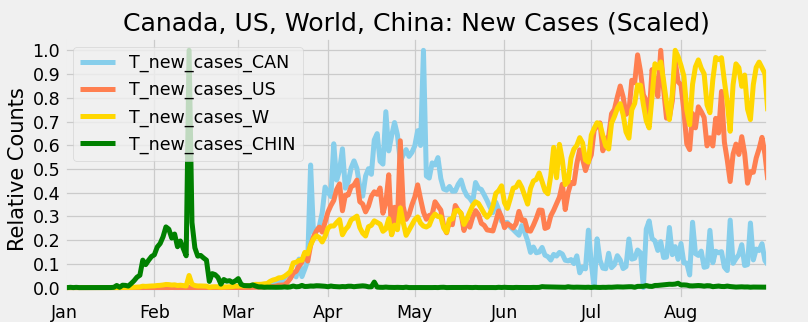

In [19]:
# new cases
T_NewCase_df = chinCanUSWorld[['date_updated','T_new_cases_CAN','T_new_cases_US','T_new_cases_W','T_new_cases_CHIN']]
T_NewCase_df.set_index(['date_updated'], inplace=True)

# plot df using fiveThirtyEight style
color_scheme = ["skyblue", "coral", "gold","green"]

plt.style.use('fivethirtyeight')

ax = T_NewCase_df.plot(figsize=(10,4), color=color_scheme)

ax.set_title("Canada, US, World, China: New Cases (Scaled)")
ax.set_ylabel("Relative Counts")
ax.set_yticks(np.arange(0, 1.1, step=0.1))
ax.legend( mode="Expanded")

plt.show()

<IPython.core.display.Javascript object>


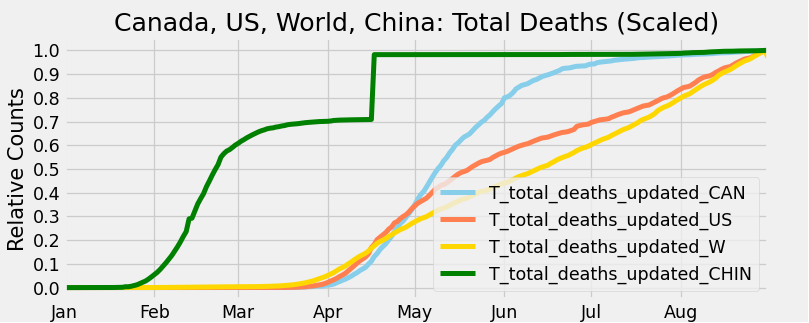

In [20]:
# total deaths
TotDeath_df = chinCanUSWorld[['date_updated','T_total_deaths_updated_CAN','T_total_deaths_updated_US','T_total_deaths_updated_W','T_total_deaths_updated_CHIN']]
TotDeath_df.set_index(['date_updated'], inplace=True)

# plot df using fiveThirtyEight style
color_scheme = ["skyblue", "coral", "gold","green"]

plt.style.use('fivethirtyeight')

ax = TotDeath_df.plot(figsize=(10,4), color=color_scheme)

ax.set_title("Canada, US, World, China: Total Deaths (Scaled)")
ax.set_ylabel("Relative Counts")
ax.set_yticks(np.arange(0, 1.1, step=0.1))
ax.legend(mode="Expanded")

plt.show()

<IPython.core.display.Javascript object>


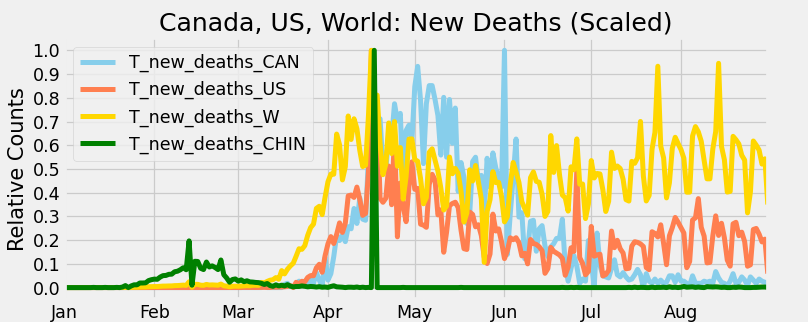

In [21]:
# new deaths
T_NewDeath_df = chinCanUSWorld[['date_updated', 'T_new_deaths_CAN', 'T_new_deaths_US','T_new_deaths_W','T_new_deaths_CHIN']]
T_NewDeath_df.set_index(['date_updated'], inplace=True)

# plot df using fiveThirtyEight style
color_scheme = ["skyblue", "coral", "gold","green"]

plt.style.use('fivethirtyeight')

ax = T_NewDeath_df.plot(figsize=(10,4), color=color_scheme)

ax.set_title("Canada, US, World: New Deaths (Scaled)")
ax.set_ylabel("Relative Counts")
ax.set_yticks(np.arange(0, 1.1, step=0.1))
ax.legend(mode="Expanded")

plt.show()

<IPython.core.display.Javascript object>


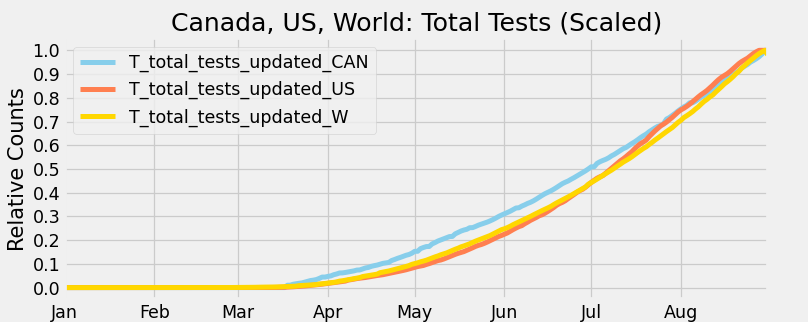

In [22]:
# total tests
T_TotTest_df = chinCanUSWorld[['date_updated','T_total_tests_updated_CAN','T_total_tests_updated_US','T_total_tests_updated_W']]
T_TotTest_df.set_index(['date_updated'], inplace=True)

# plot df using fiveThirtyEight style
color_scheme = ["skyblue", "coral", "gold",]

plt.style.use('fivethirtyeight')

ax = T_TotTest_df.plot(figsize=(10,4), color=color_scheme)

ax.set_title("Canada, US, World: Total Tests (Scaled)")
ax.set_ylabel("Relative Counts")
ax.set_yticks(np.arange(0, 1.1, step=0.1))
ax.legend(mode="Expanded")

plt.show()

<IPython.core.display.Javascript object>


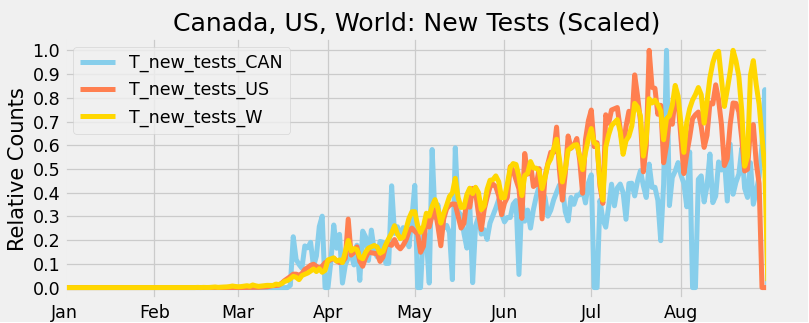

In [23]:
# new tests
T_NewTest_df = chinCanUSWorld[['date_updated','T_new_tests_CAN','T_new_tests_US','T_new_tests_W']]
T_NewTest_df.set_index(['date_updated'], inplace=True)

# plot df using fiveThirtyEight style
color_scheme = ["skyblue", "coral", "gold",]

plt.style.use('fivethirtyeight')

ax = T_NewTest_df.plot(figsize=(10,4), color=color_scheme)

ax.set_title("Canada, US, World: New Tests (Scaled)")
ax.set_ylabel("Relative Counts")
ax.set_yticks(np.arange(0, 1.1, step=0.1))
ax.legend(mode="Expanded")

plt.show()

<IPython.core.display.Javascript object>


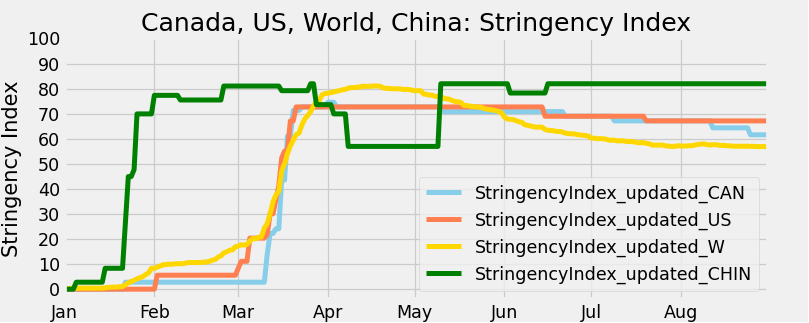

In [24]:
# stringency index
String_df = chinCanUSWorld[['date_updated', 'StringencyIndex_updated_CAN', 'StringencyIndex_updated_US','StringencyIndex_updated_W','StringencyIndex_updated_CHIN']]
String_df.set_index(['date_updated'], inplace=True)

# plot df using fiveThirtyEight style
color_scheme = ["skyblue", "coral", "gold","green"]

plt.style.use('fivethirtyeight')

ax = String_df.plot(figsize=(10,4), color=color_scheme)

ax.set_title("Canada, US, World, China: Stringency Index")
ax.set_ylabel("Stringency Index")
ax.set_yticks(np.arange(0, 110, step=10))

ax.legend(mode="Expanded")

plt.show()

<IPython.core.display.Javascript object>


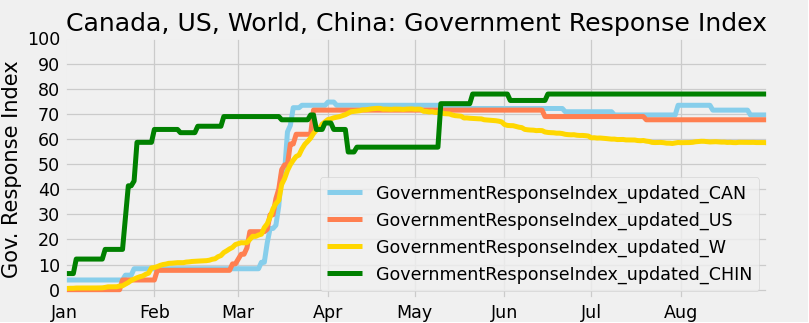

In [25]:
# government response
GovResp_df = chinCanUSWorld[['date_updated','GovernmentResponseIndex_updated_CAN','GovernmentResponseIndex_updated_US','GovernmentResponseIndex_updated_W','GovernmentResponseIndex_updated_CHIN']]
GovResp_df.set_index(['date_updated'], inplace=True)

# plot df using fiveThirtyEight style
color_scheme = ["skyblue", "coral", "gold","green"]

plt.style.use('fivethirtyeight')

ax = GovResp_df.plot(figsize=(10,4), color=color_scheme)

ax.set_title("Canada, US, World, China: Government Response Index")
ax.set_ylabel("Gov. Response Index")
ax.set_yticks(np.arange(0, 110, step=10))
ax.legend(mode="Expanded")

plt.show()

<IPython.core.display.Javascript object>


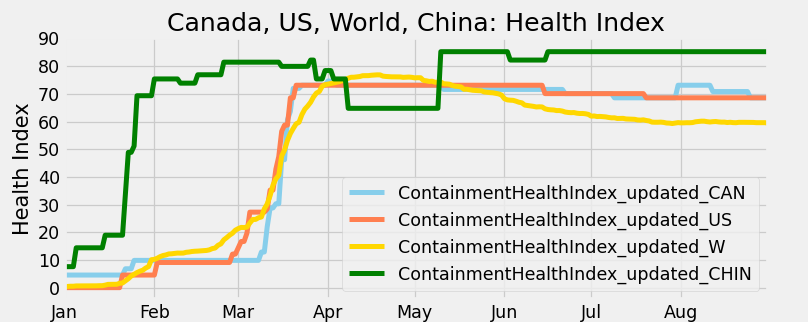

In [26]:
# health index
HealthIndex_df = chinCanUSWorld[['date_updated','ContainmentHealthIndex_updated_CAN','ContainmentHealthIndex_updated_US','ContainmentHealthIndex_updated_W','ContainmentHealthIndex_updated_CHIN']]
HealthIndex_df.set_index(['date_updated'], inplace=True)

# plot df using fiveThirtyEight style
color_scheme = ["skyblue", "coral", "gold","green"]

plt.style.use('fivethirtyeight')

ax = HealthIndex_df.plot(figsize=(10,4), color=color_scheme)

ax.set_title("Canada, US, World, China: Health Index")
ax.set_ylabel("Health Index")
ax.set_yticks(np.arange(0, 100, step=10))
ax.legend(mode="Expanded")

plt.show()

<IPython.core.display.Javascript object>


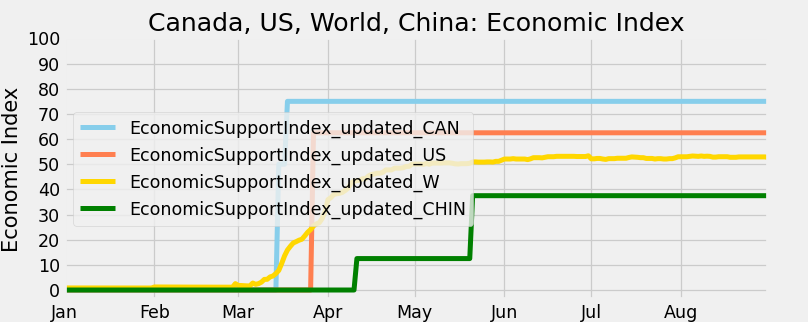

In [27]:
# economic index
EconIndex_df = chinCanUSWorld[['date_updated','EconomicSupportIndex_updated_CAN','EconomicSupportIndex_updated_US','EconomicSupportIndex_updated_W','EconomicSupportIndex_updated_CHIN']]
EconIndex_df.set_index(['date_updated'], inplace=True)

# plot df using fiveThirtyEight style
color_scheme = ["skyblue", "coral", "gold","green"]

plt.style.use('fivethirtyeight')

ax = EconIndex_df.plot(figsize=(10,4), color=color_scheme)

ax.set_title("Canada, US, World, China: Economic Index")
ax.set_ylabel("Economic Index")
ax.set_yticks(np.arange(0, 110, step=10))
ax.legend(mode="Expanded")

plt.show()

In [28]:
# dates after April 1, 2020
startApr1 = merged_covid.loc[merged_covid['date_updated'] > '2020-03-31']
startApr1

,primary_key_reaction,date_updated,iso_code,continent,location,population,population_density,median_age,new_cases,percentage_of_Pop_New_Cases,...,primary_key_response,StringencyIndex_updated,percentage_change_stringency,StringencyLegacyIndex_updated,GovernmentResponseIndex_updated,percentage_change_GovernmentResponse,ContainmentHealthIndex_updated,percentage_change_ContainmentHealth,EconomicSupportIndex_updated,percentage_change_EconomicSupport
14,ABW2020-04-01,2020-04-01,ABW,North America,Aruba,106766.0,584.800,41.2,5.0,0.004683,...,ABW2020-04-01,85.19,0.0,85.71,78.85,7.895457,77.27,0.0,87.5,75.0
15,ABW2020-04-02,2020-04-02,ABW,North America,Aruba,106766.0,584.800,41.2,0.0,0.000000,...,ABW2020-04-02,85.19,0.0,85.71,78.85,0.000000,77.27,0.0,87.5,0.0
16,ABW2020-04-03,2020-04-03,ABW,North America,Aruba,106766.0,584.800,41.2,5.0,0.004683,...,ABW2020-04-03,85.19,0.0,85.71,78.85,0.000000,77.27,0.0,87.5,0.0
17,ABW2020-04-04,2020-04-04,ABW,North America,Aruba,106766.0,584.800,41.2,2.0,0.001873,...,ABW2020-04-04,85.19,0.0,85.71,78.85,0.000000,77.27,0.0,87.5,0.0
18,ABW2020-04-05,2020-04-05,ABW,North America,Aruba,106766.0,584.800,41.2,2.0,0.001873,...,ABW2020-04-05,85.19,0.0,85.71,78.85,0.000000,77.27,0.0,87.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32272,ZWE2020-08-27,2020-08-27,ZWE,Africa,Zimbabwe,14862927.0,42.729,19.6,55.0,0.000370,...,ZWE2020-08-27,80.56,0.0,88.10,66.03,0.000000,73.48,0.0,25.0,0.0
32273,ZWE2020-08-28,2020-08-28,ZWE,Africa,Zimbabwe,14862927.0,42.729,19.6,41.0,0.000276,...,ZWE2020-08-28,80.56,0.0,88.10,66.03,0.000000,73.48,0.0,25.0,0.0
32274,ZWE2020-08-29,2020-08-29,ZWE,Africa,Zimbabwe,14862927.0,42.729,19.6,96.0,0.000646,...,ZWE2020-08-29,80.56,0.0,88.10,66.03,0.000000,73.48,0.0,25.0,0.0
32275,ZWE2020-08-30,2020-08-30,ZWE,Africa,Zimbabwe,14862927.0,42.729,19.6,18.0,0.000121,...,ZWE2020-08-30,80.56,0.0,88.10,66.03,0.000000,73.48,0.0,25.0,0.0


In [29]:
# group by country, then average the columns
grp_startApr1 = startApr1.groupby('location').mean()
grp_startApr1

,population,population_density,median_age,new_cases,percentage_of_Pop_New_Cases,new_deaths,percentage_of_Pop_New_Deaths,new_tests,percentage_of_Pop_New_Tests,total_cases_updated,...,percentage_of_Pop_Total_Tests,StringencyIndex_updated,percentage_change_stringency,StringencyLegacyIndex_updated,GovernmentResponseIndex_updated,percentage_change_GovernmentResponse,ContainmentHealthIndex_updated,percentage_change_ContainmentHealth,EconomicSupportIndex_updated,percentage_change_EconomicSupport
location,,,,,,,,,,,,,,,,,,,,,
Afghanistan,38928341.0,54.422,18.6,248.503268,0.000638,9.137255,2.347199e-07,0.000000,0.000000,20966.882353,...,0.000000,77.056601,-0.164218,77.667778,60.578889,-0.026011,71.595294,-0.025953,0.000000,0.000000
Albania,2877800.0,104.871,38.0,59.849673,0.002080,1.751634,6.086712e-07,0.000000,0.000000,2849.790850,...,0.000000,71.082157,-0.267050,76.191830,68.489542,-0.130572,69.281699,-0.168363,64.133987,0.348584
Algeria,43851043.0,17.348,29.1,284.718954,0.000649,9.581699,2.185056e-07,0.000000,0.000000,15910.084967,...,0.000000,77.349804,0.008771,84.797190,66.171046,0.154360,70.179869,0.088068,44.117647,0.631808
Angola,32866268.0,23.890,16.8,17.104575,0.000052,0.686275,2.088082e-08,0.000000,0.000000,534.209150,...,0.000000,79.376863,-0.102385,84.768235,67.044379,0.021901,71.983987,-0.024492,39.869281,-0.108932
Argentina,45195777.0,16.177,31.9,2616.078431,0.005788,54.751634,1.211433e-06,7038.601307,0.015574,89265.274510,...,0.744936,91.496536,-0.067203,93.972157,85.190196,-0.059472,87.041569,-0.067969,75.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,28435943.0,36.253,29.0,298.908497,0.001051,2.470588,8.688259e-08,0.000000,0.000000,9497.633987,...,0.000000,84.127516,0.046443,86.084183,72.385621,0.083227,76.455817,0.095256,50.000000,0.000000
Vietnam,97338583.0,308.127,32.6,5.450980,0.000006,0.209150,2.148689e-09,263.307190,0.000271,437.509804,...,0.245062,68.959869,-0.005406,77.360196,67.005033,0.028483,73.456863,-0.045158,31.535948,0.653595
Yemen,29825968.0,53.508,20.3,13.562500,0.000045,3.916667,1.313173e-07,0.000000,0.000000,900.388889,...,0.000000,46.230000,-0.007651,58.963194,32.003750,-0.007669,37.827153,-0.007565,0.000000,0.000000


In [30]:
# top 5 countries
sortedHiString = grp_startApr1.sort_values(by='StringencyIndex_updated', ascending=False)
display(sortedHiString.head(10))

StringIndex_updated = sortedHiString['StringencyIndex_updated']
top5_String = StringIndex_updated[0:5]
display(top5_String)

StringIndex_updated.to_csv("stringency.csv")

,population,population_density,median_age,new_cases,percentage_of_Pop_New_Cases,new_deaths,percentage_of_Pop_New_Deaths,new_tests,percentage_of_Pop_New_Tests,total_cases_updated,...,percentage_of_Pop_Total_Tests,StringencyIndex_updated,percentage_change_stringency,StringencyLegacyIndex_updated,GovernmentResponseIndex_updated,percentage_change_GovernmentResponse,ContainmentHealthIndex_updated,percentage_change_ContainmentHealth,EconomicSupportIndex_updated,percentage_change_EconomicSupport
location,,,,,,,,,,,,,,,,,,,,,
Honduras,9904608.0,82.805,24.9,392.372549,0.003962,12.098039,1.221456e-06,0.000000,0.000000,19067.163399,...,0.000000,96.764052,-0.122027,96.965686,86.684510,0.022795,86.741634,-0.111078,86.356209,0.000000
Libya,6871287.0,3.623,29.0,87.679739,0.001276,1.516340,2.206777e-07,0.000000,0.000000,2040.973856,...,0.000000,93.838954,-0.016167,97.153333,71.376405,-0.014936,84.352876,-0.014941,0.000000,0.000000
Guatemala,17915567.0,157.834,22.9,482.849673,0.002695,17.901961,9.992405e-07,0.000000,0.000000,21762.326797,...,0.000000,93.812288,-0.043419,97.643333,79.823856,0.056433,82.814248,-0.040422,63.398693,-0.108932
Eritrea,3546427.0,44.304,19.3,2.000000,0.000056,0.000000,0.000000e+00,0.000000,0.000000,141.784314,...,0.000000,93.520000,0.105146,96.430000,75.000000,0.088789,84.090000,0.094375,25.000000,0.000000
El Salvador,6486201.0,307.811,27.6,167.954248,0.002589,4.686275,7.224991e-07,1991.398693,0.030702,7746.941176,...,2.114738,92.584510,0.010670,96.430000,84.830980,0.129148,87.624902,0.069995,69.444444,0.980392
Bolivia,11673029.0,10.202,25.4,757.261438,0.006487,32.418301,2.777197e-06,1510.954248,0.012944,35523.143791,...,0.657737,92.168366,-0.044184,94.190000,72.405294,-0.050399,78.325686,-0.017326,39.869281,-0.326797
Argentina,45195777.0,16.177,31.9,2616.078431,0.005788,54.751634,1.211433e-06,7038.601307,0.015574,89265.274510,...,0.744936,91.496536,-0.067203,93.972157,85.190196,-0.059472,87.041569,-0.067969,75.000000,0.000000
Iraq,40222503.0,88.125,20.0,1506.843137,0.003746,45.183007,1.123327e-06,7647.758170,0.019014,57834.947712,...,1.308145,91.109608,-0.015995,94.991111,77.430850,0.053708,85.147255,-0.015166,34.967320,0.000000
Nepal,29136808.0,204.430,25.0,252.000000,0.000865,1.444444,4.957456e-08,3616.522876,0.012412,10337.418301,...,0.678959,90.219346,-0.148155,94.816993,83.451307,-0.080512,86.592549,-0.056293,66.176471,-0.217865


location
Honduras       96.764052
Libya          93.838954
Guatemala      93.812288
Eritrea        93.520000
El Salvador    92.584510
Name: StringencyIndex_updated, dtype: float64

In [31]:
# bottom 5 countries
sortedLoString = grp_startApr1.sort_values(by='StringencyIndex_updated', ascending=True)
display(sortedLoString.head(10))

StringIndex_updated = sortedLoString['StringencyIndex_updated']
bottom5_String = StringIndex_updated[0:5]
bottom5_String

,population,population_density,median_age,new_cases,percentage_of_Pop_New_Cases,new_deaths,percentage_of_Pop_New_Deaths,new_tests,percentage_of_Pop_New_Tests,total_cases_updated,...,percentage_of_Pop_Total_Tests,StringencyIndex_updated,percentage_change_stringency,StringencyLegacyIndex_updated,GovernmentResponseIndex_updated,percentage_change_GovernmentResponse,ContainmentHealthIndex_updated,percentage_change_ContainmentHealth,EconomicSupportIndex_updated,percentage_change_EconomicSupport
location,,,,,,,,,,,,,,,,,,,,,
Belarus,9449321.0,46.858,40.3,467.856209,0.004951,4.418301,4.675786e-07,3044.875817,0.032223,44337.614379,...,7.937378,12.944118,0.390765,18.730915,22.989020,1.258620,27.170261,1.258683,0.000000,0.000000
Nicaragua,6624554.0,51.667,27.3,29.346405,0.000443,0.888889,1.341809e-07,0.000000,0.000000,1817.581699,...,0.000000,13.435752,0.763475,17.494444,12.116340,0.585970,14.321111,0.586484,0.000000,0.000000
Burundi,11890781.0,423.062,17.5,2.908497,0.000024,0.006536,5.496651e-10,0.000000,0.000000,168.267974,...,0.000000,26.869346,-0.333112,35.684771,26.477778,-0.057697,31.294248,-0.057345,0.000000,0.000000
Niger,24206636.0,16.955,15.1,7.555556,0.000031,0.431373,1.782043e-08,0.000000,0.000000,925.202614,...,0.000000,32.968693,-0.760007,39.123399,33.332222,-0.387357,34.553922,-0.601529,26.633987,0.653595
Japan,126476458.0,347.778,48.2,430.797386,0.000341,7.993464,6.320120e-08,2726.150327,0.002155,24006.960784,...,0.549528,34.089150,-0.117631,46.272353,42.563333,0.036942,37.111438,-0.018975,72.549020,0.326797
Tanzania,59734213.0,64.699,17.7,3.202614,0.000005,0.130719,2.188343e-09,0.000000,0.000000,434.300654,...,0.000000,35.470327,-0.412838,38.164641,27.344510,-0.491543,32.317190,-0.491411,0.000000,0.000000
Iceland,341250.0,3.404,37.3,6.660131,0.001952,0.052288,1.532237e-07,453.294118,0.132833,1821.470588,...,18.075647,41.240588,-0.157161,45.050327,59.322876,-0.090820,51.925294,-0.115739,100.000000,0.000000
Sweden,10099270.0,24.718,41.0,522.973856,0.005178,36.483660,3.612505e-06,3392.209150,0.033589,49603.294118,...,0.000000,41.953725,0.053022,52.503464,46.560327,0.068056,43.658954,0.090813,62.500000,0.000000
Estonia,1326539.0,31.033,42.7,10.836601,0.000817,0.398693,3.005511e-07,872.666667,0.065785,1857.405229,...,6.832430,42.700065,-0.809534,47.488824,41.612288,-0.498476,40.859673,-0.657982,45.751634,0.653595


location
Belarus      12.944118
Nicaragua    13.435752
Burundi      26.869346
Niger        32.968693
Japan        34.089150
Name: StringencyIndex_updated, dtype: float64

In [32]:
# top 5 countries
sortedHiGovResp = grp_startApr1.sort_values(by='GovernmentResponseIndex_updated', ascending=False)
display(sortedHiGovResp.head(10))

sortedHiGovResp = sortedHiGovResp['GovernmentResponseIndex_updated']
top5_GovResp = sortedHiGovResp[0:5]
top5_GovResp

display(sortedHiGovResp)
sortedHiGovResp.to_csv("gov_resp.csv")

,population,population_density,median_age,new_cases,percentage_of_Pop_New_Cases,new_deaths,percentage_of_Pop_New_Deaths,new_tests,percentage_of_Pop_New_Tests,total_cases_updated,...,percentage_of_Pop_Total_Tests,StringencyIndex_updated,percentage_change_stringency,StringencyLegacyIndex_updated,GovernmentResponseIndex_updated,percentage_change_GovernmentResponse,ContainmentHealthIndex_updated,percentage_change_ContainmentHealth,EconomicSupportIndex_updated,percentage_change_EconomicSupport
location,,,,,,,,,,,,,,,,,,,,,
Honduras,9.904608e+06,82.805,24.9,392.372549,0.003962,12.098039,1.221456e-06,0.000000,0.000000,19067.163399,...,0.000000,96.764052,-0.122027,96.965686,86.684510,0.022795,86.741634,-0.111078,86.356209,0.000000
Argentina,4.519578e+07,16.177,31.9,2616.078431,0.005788,54.751634,1.211433e-06,7038.601307,0.015574,89265.274510,...,0.744936,91.496536,-0.067203,93.972157,85.190196,-0.059472,87.041569,-0.067969,75.000000,0.000000
El Salvador,6.486201e+06,307.811,27.6,167.954248,0.002589,4.686275,7.224991e-07,1991.398693,0.030702,7746.941176,...,2.114738,92.584510,0.010670,96.430000,84.830980,0.129148,87.624902,0.069995,69.444444,0.980392
Colombia,5.088288e+07,44.223,32.2,3968.235294,0.007799,126.470588,2.485523e-06,16874.771242,0.033164,142613.464052,...,1.616821,87.154118,-0.004796,92.183333,84.497516,0.059488,86.395098,0.031622,74.019608,0.326797
Nepal,2.913681e+07,204.430,25.0,252.000000,0.000865,1.444444,4.957456e-08,3616.522876,0.012412,10337.418301,...,0.678959,90.219346,-0.148155,94.816993,83.451307,-0.080512,86.592549,-0.056293,66.176471,-0.217865
Oman,5.106622e+06,14.980,30.7,557.941176,0.010926,4.424837,8.664899e-07,1311.372549,0.025680,34982.392157,...,0.000000,88.717255,0.020758,92.026863,82.975621,0.099835,87.740784,0.015290,56.781046,0.000000
Peru,3.297185e+07,25.129,29.1,4223.633987,0.012810,188.000000,5.701834e-06,3512.039216,0.010652,240617.143791,...,0.696795,87.876863,-0.059810,88.554837,82.792353,0.005293,84.210327,0.007192,75.000000,0.000000
India,1.380004e+09,450.419,28.2,23660.091503,0.001714,421.156863,3.051852e-07,265527.496732,0.019241,826061.490196,...,0.771716,82.604314,-0.137808,85.445817,82.670196,-0.081898,84.063007,-0.093659,75.000000,0.000000
Azerbaijan,1.013918e+07,119.309,32.4,235.529412,0.002323,3.444444,3.397164e-07,0.000000,0.000000,14950.555556,...,0.000000,88.032157,0.002654,88.459281,81.104902,0.063448,87.176405,-0.002564,47.712418,0.000000


location
Honduras       86.684510
Argentina      85.190196
El Salvador    84.830980
Colombia       84.497516
Nepal          83.451307
                 ...    
Yemen          32.003750
Tanzania       27.344510
Burundi        26.477778
Belarus        22.989020
Nicaragua      12.116340
Name: GovernmentResponseIndex_updated, Length: 164, dtype: float64

In [33]:
# bottom 5 countries
sortedLoGovResp = grp_startApr1.sort_values(by='GovernmentResponseIndex_updated', ascending=True)
display(sortedLoGovResp.head(10))

sortedLoGovResp = sortedLoGovResp['GovernmentResponseIndex_updated']
bottom5_GovResp = sortedLoGovResp[0:5]
bottom5_GovResp

,population,population_density,median_age,new_cases,percentage_of_Pop_New_Cases,new_deaths,percentage_of_Pop_New_Deaths,new_tests,percentage_of_Pop_New_Tests,total_cases_updated,...,percentage_of_Pop_Total_Tests,StringencyIndex_updated,percentage_change_stringency,StringencyLegacyIndex_updated,GovernmentResponseIndex_updated,percentage_change_GovernmentResponse,ContainmentHealthIndex_updated,percentage_change_ContainmentHealth,EconomicSupportIndex_updated,percentage_change_EconomicSupport
location,,,,,,,,,,,,,,,,,,,,,
Nicaragua,6624554.0,51.667,27.3,29.346405,0.000443,0.888889,1.341809e-07,0.000000,0.000000,1817.581699,...,0.000000,13.435752,0.763475,17.494444,12.116340,0.585970,14.321111,0.586484,0.000000,0.000000
Belarus,9449321.0,46.858,40.3,467.856209,0.004951,4.418301,4.675786e-07,3044.875817,0.032223,44337.614379,...,7.937378,12.944118,0.390765,18.730915,22.989020,1.258620,27.170261,1.258683,0.000000,0.000000
Burundi,11890781.0,423.062,17.5,2.908497,0.000024,0.006536,5.496651e-10,0.000000,0.000000,168.267974,...,0.000000,26.869346,-0.333112,35.684771,26.477778,-0.057697,31.294248,-0.057345,0.000000,0.000000
Tanzania,59734213.0,64.699,17.7,3.202614,0.000005,0.130719,2.188343e-09,0.000000,0.000000,434.300654,...,0.000000,35.470327,-0.412838,38.164641,27.344510,-0.491543,32.317190,-0.491411,0.000000,0.000000
Yemen,29825968.0,53.508,20.3,13.562500,0.000045,3.916667,1.313173e-07,0.000000,0.000000,900.388889,...,0.000000,46.230000,-0.007651,58.963194,32.003750,-0.007669,37.827153,-0.007565,0.000000,0.000000
Somalia,15893219.0,23.500,16.8,21.614379,0.000136,0.640523,4.030165e-08,0.000000,0.000000,2071.169935,...,0.000000,42.745621,-0.709509,52.087320,33.312876,-0.316443,38.328039,-0.429564,5.718954,0.000000
Niger,24206636.0,16.955,15.1,7.555556,0.000031,0.431373,1.782043e-08,0.000000,0.000000,925.202614,...,0.000000,32.968693,-0.760007,39.123399,33.332222,-0.387357,34.553922,-0.601529,26.633987,0.653595
Estonia,1326539.0,31.033,42.7,10.836601,0.000817,0.398693,3.005511e-07,872.666667,0.065785,1857.405229,...,6.832430,42.700065,-0.809534,47.488824,41.612288,-0.498476,40.859673,-0.657982,45.751634,0.653595
Japan,126476458.0,347.778,48.2,430.797386,0.000341,7.993464,6.320120e-08,2726.150327,0.002155,24006.960784,...,0.549528,34.089150,-0.117631,46.272353,42.563333,0.036942,37.111438,-0.018975,72.549020,0.326797


location
Nicaragua    12.116340
Belarus      22.989020
Burundi      26.477778
Tanzania     27.344510
Yemen        32.003750
Name: GovernmentResponseIndex_updated, dtype: float64

In [34]:
# top 5 countries
sortedHiHealth = grp_startApr1.sort_values(by='ContainmentHealthIndex_updated', ascending=False)
display(sortedHiHealth.head(10))

sortedHiHealth = sortedHiHealth['ContainmentHealthIndex_updated']
top5_Health = sortedHiHealth[0:5]
top5_Health

sortedHiHealth.to_csv("health.csv")

,population,population_density,median_age,new_cases,percentage_of_Pop_New_Cases,new_deaths,percentage_of_Pop_New_Deaths,new_tests,percentage_of_Pop_New_Tests,total_cases_updated,...,percentage_of_Pop_Total_Tests,StringencyIndex_updated,percentage_change_stringency,StringencyLegacyIndex_updated,GovernmentResponseIndex_updated,percentage_change_GovernmentResponse,ContainmentHealthIndex_updated,percentage_change_ContainmentHealth,EconomicSupportIndex_updated,percentage_change_EconomicSupport
location,,,,,,,,,,,,,,,,,,,,,
Oman,5106622.0,14.980,30.7,557.941176,0.010926,4.424837,8.664899e-07,1311.372549,0.025680,34982.392157,...,0.000000,88.717255,0.020758,92.026863,82.975621,0.099835,87.740784,0.015290,56.781046,0.000000
El Salvador,6486201.0,307.811,27.6,167.954248,0.002589,4.686275,7.224991e-07,1991.398693,0.030702,7746.941176,...,2.114738,92.584510,0.010670,96.430000,84.830980,0.129148,87.624902,0.069995,69.444444,0.980392
Azerbaijan,10139175.0,119.309,32.4,235.529412,0.002323,3.444444,3.397164e-07,0.000000,0.000000,14950.555556,...,0.000000,88.032157,0.002654,88.459281,81.104902,0.063448,87.176405,-0.002564,47.712418,0.000000
Argentina,45195777.0,16.177,31.9,2616.078431,0.005788,54.751634,1.211433e-06,7038.601307,0.015574,89265.274510,...,0.744936,91.496536,-0.067203,93.972157,85.190196,-0.059472,87.041569,-0.067969,75.000000,0.000000
Honduras,9904608.0,82.805,24.9,392.372549,0.003962,12.098039,1.221456e-06,0.000000,0.000000,19067.163399,...,0.000000,96.764052,-0.122027,96.965686,86.684510,0.022795,86.741634,-0.111078,86.356209,0.000000
Nepal,29136808.0,204.430,25.0,252.000000,0.000865,1.444444,4.957456e-08,3616.522876,0.012412,10337.418301,...,0.678959,90.219346,-0.148155,94.816993,83.451307,-0.080512,86.592549,-0.056293,66.176471,-0.217865
Colombia,50882884.0,44.223,32.2,3968.235294,0.007799,126.470588,2.485523e-06,16874.771242,0.033164,142613.464052,...,1.616821,87.154118,-0.004796,92.183333,84.497516,0.059488,86.395098,0.031622,74.019608,0.326797
Philippines,109581085.0,351.873,25.2,1407.267974,0.001284,22.431373,2.047011e-07,15576.692810,0.014215,52759.771242,...,0.696103,86.111895,-0.207430,90.451895,76.052549,-0.159006,86.001895,-0.171286,21.323529,0.294118
Iraq,40222503.0,88.125,20.0,1506.843137,0.003746,45.183007,1.123327e-06,7647.758170,0.019014,57834.947712,...,1.308145,91.109608,-0.015995,94.991111,77.430850,0.053708,85.147255,-0.015166,34.967320,0.000000


In [35]:
# lowest 5 countries
sortedLoHealth = grp_startApr1.sort_values(by='ContainmentHealthIndex_updated', ascending=True)
display(sortedLoHealth.head(10))

sortedLoHealth = sortedLoHealth['ContainmentHealthIndex_updated']
bottom5_Health = sortedLoHealth[0:5]
bottom5_Health

,population,population_density,median_age,new_cases,percentage_of_Pop_New_Cases,new_deaths,percentage_of_Pop_New_Deaths,new_tests,percentage_of_Pop_New_Tests,total_cases_updated,...,percentage_of_Pop_Total_Tests,StringencyIndex_updated,percentage_change_stringency,StringencyLegacyIndex_updated,GovernmentResponseIndex_updated,percentage_change_GovernmentResponse,ContainmentHealthIndex_updated,percentage_change_ContainmentHealth,EconomicSupportIndex_updated,percentage_change_EconomicSupport
location,,,,,,,,,,,,,,,,,,,,,
Nicaragua,6624554.0,51.667,27.3,29.346405,0.000443,0.888889,1.341809e-07,0.000000,0.000000,1817.581699,...,0.000000,13.435752,0.763475,17.494444,12.116340,0.585970,14.321111,0.586484,0.000000,0.000000
Belarus,9449321.0,46.858,40.3,467.856209,0.004951,4.418301,4.675786e-07,3044.875817,0.032223,44337.614379,...,7.937378,12.944118,0.390765,18.730915,22.989020,1.258620,27.170261,1.258683,0.000000,0.000000
Burundi,11890781.0,423.062,17.5,2.908497,0.000024,0.006536,5.496651e-10,0.000000,0.000000,168.267974,...,0.000000,26.869346,-0.333112,35.684771,26.477778,-0.057697,31.294248,-0.057345,0.000000,0.000000
Tanzania,59734213.0,64.699,17.7,3.202614,0.000005,0.130719,2.188343e-09,0.000000,0.000000,434.300654,...,0.000000,35.470327,-0.412838,38.164641,27.344510,-0.491543,32.317190,-0.491411,0.000000,0.000000
Niger,24206636.0,16.955,15.1,7.555556,0.000031,0.431373,1.782043e-08,0.000000,0.000000,925.202614,...,0.000000,32.968693,-0.760007,39.123399,33.332222,-0.387357,34.553922,-0.601529,26.633987,0.653595
Japan,126476458.0,347.778,48.2,430.797386,0.000341,7.993464,6.320120e-08,2726.150327,0.002155,24006.960784,...,0.549528,34.089150,-0.117631,46.272353,42.563333,0.036942,37.111438,-0.018975,72.549020,0.326797
Yemen,29825968.0,53.508,20.3,13.562500,0.000045,3.916667,1.313173e-07,0.000000,0.000000,900.388889,...,0.000000,46.230000,-0.007651,58.963194,32.003750,-0.007669,37.827153,-0.007565,0.000000,0.000000
Somalia,15893219.0,23.500,16.8,21.614379,0.000136,0.640523,4.030165e-08,0.000000,0.000000,2071.169935,...,0.000000,42.745621,-0.709509,52.087320,33.312876,-0.316443,38.328039,-0.429564,5.718954,0.000000
Estonia,1326539.0,31.033,42.7,10.836601,0.000817,0.398693,3.005511e-07,872.666667,0.065785,1857.405229,...,6.832430,42.700065,-0.809534,47.488824,41.612288,-0.498476,40.859673,-0.657982,45.751634,0.653595


location
Nicaragua    14.321111
Belarus      27.170261
Burundi      31.294248
Tanzania     32.317190
Niger        34.553922
Name: ContainmentHealthIndex_updated, dtype: float64

In [36]:
# top 5 countries
sortedHiEcon = grp_startApr1.sort_values(by='EconomicSupportIndex_updated', ascending=False)
display(sortedHiEcon.head(10))

null = sortedHiEcon.loc[sortedHiEcon['EconomicSupportIndex_updated'].isnull() == True]
display(null)

sortedHiEcon = sortedHiEcon['EconomicSupportIndex_updated']
top5_Econ = sortedHiEcon[0:5]
top5_Econ

sortedHiEcon.to_csv("econ_support.csv")

,population,population_density,median_age,new_cases,percentage_of_Pop_New_Cases,new_deaths,percentage_of_Pop_New_Deaths,new_tests,percentage_of_Pop_New_Tests,total_cases_updated,...,percentage_of_Pop_Total_Tests,StringencyIndex_updated,percentage_change_stringency,StringencyLegacyIndex_updated,GovernmentResponseIndex_updated,percentage_change_GovernmentResponse,ContainmentHealthIndex_updated,percentage_change_ContainmentHealth,EconomicSupportIndex_updated,percentage_change_EconomicSupport
location,,,,,,,,,,,,,,,,,,,,,
Iceland,341250.0,3.404,37.3,6.660131,0.001952,0.052288,1.532237e-07,453.294118,0.132833,1821.470588,...,18.075647,41.240588,-0.157161,45.050327,59.322876,-0.090820,51.925294,-0.115739,100.000000,0.000000
Ireland,4937796.0,69.874,38.7,168.954248,0.003422,11.261438,2.280661e-06,5188.967320,0.105087,22717.084967,...,8.193161,68.723399,0.072093,76.795359,73.010980,0.026242,68.103725,0.058974,100.000000,0.000000
Hong Kong,7496988.0,7039.714,44.8,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,7.667450,64.077333,0.000000,72.904667,73.418000,0.229514,68.588000,0.289813,100.000000,0.000000
Cyprus,875899.0,127.657,37.3,8.215686,0.000938,0.091503,1.044678e-07,0.000000,0.000000,977.516340,...,0.000000,67.632549,-0.359426,78.064771,76.879542,-0.160986,72.677843,-0.197640,100.000000,0.000000
United Kingdom,67886004.0,272.898,40.8,1992.065359,0.002934,257.836601,3.798082e-06,85326.960784,0.125692,241236.013072,...,7.842018,71.124510,-0.129533,75.427778,73.717320,0.003083,68.934118,0.005953,100.000000,0.000000
Israel,8655541.0,402.606,30.6,715.993464,0.008272,5.895425,6.811157e-07,14430.320261,0.166718,37404.993464,...,11.614332,68.597059,-0.510273,77.613725,71.220523,-0.360339,65.988170,-0.474817,100.000000,0.000000
Luxembourg,625976.0,231.447,39.7,30.307190,0.004842,0.666667,1.065004e-06,2389.163399,0.381670,4765.522876,...,26.035476,44.135229,-0.217096,50.198497,59.708039,-0.233603,52.707778,-0.285528,98.202614,0.011671
Croatia,4105268.0,73.726,44.0,61.000000,0.001486,1.163399,2.833917e-07,1011.196078,0.024632,3404.346405,...,1.880037,52.330000,-0.625474,61.775556,64.302941,-0.328182,59.374706,-0.468728,91.421569,0.354809
Thailand,69799978.0,135.132,40.1,11.509804,0.000016,0.313725,4.494636e-09,2236.032680,0.003203,3064.418301,...,0.336383,62.060131,-0.223531,69.621503,68.530980,0.075977,64.652157,-0.093402,89.869281,-0.163399


,population,population_density,median_age,new_cases,percentage_of_Pop_New_Cases,new_deaths,percentage_of_Pop_New_Deaths,new_tests,percentage_of_Pop_New_Tests,total_cases_updated,...,percentage_of_Pop_Total_Tests,StringencyIndex_updated,percentage_change_stringency,StringencyLegacyIndex_updated,GovernmentResponseIndex_updated,percentage_change_GovernmentResponse,ContainmentHealthIndex_updated,percentage_change_ContainmentHealth,EconomicSupportIndex_updated,percentage_change_EconomicSupport
location,,,,,,,,,,,,,,,,,,,,,


In [37]:
# bottom 5 countries
sortedLoEcon = grp_startApr1.sort_values(by='EconomicSupportIndex_updated', ascending=True)
display(sortedLoEcon.head(30))

sortedLoEcon = sortedLoEcon['EconomicSupportIndex_updated']
bottom5_Econ = sortedLoEcon[0:5]
bottom5_Econ

,population,population_density,median_age,new_cases,percentage_of_Pop_New_Cases,new_deaths,percentage_of_Pop_New_Deaths,new_tests,percentage_of_Pop_New_Tests,total_cases_updated,...,percentage_of_Pop_Total_Tests,StringencyIndex_updated,percentage_change_stringency,StringencyLegacyIndex_updated,GovernmentResponseIndex_updated,percentage_change_GovernmentResponse,ContainmentHealthIndex_updated,percentage_change_ContainmentHealth,EconomicSupportIndex_updated,percentage_change_EconomicSupport
location,,,,,,,,,,,,,,,,,,,,,
Afghanistan,38928341.0,54.422,18.6,248.503268,0.000638,9.137255,2.347199e-07,0.000000,0.000000,20966.882353,...,0.000000,77.056601,-0.164218,77.667778,60.578889,-0.026011,71.595294,-0.025953,0.000000,0.000000
Gambia,2416664.0,207.566,17.5,19.339869,0.000800,0.620915,2.569306e-07,0.000000,0.000000,389.588235,...,0.000000,71.361307,0.495360,80.866144,60.490523,0.284499,71.490588,0.284555,0.000000,0.000000
Guinea,13132792.0,51.755,19.0,61.143791,0.000466,0.385621,2.936321e-08,0.000000,0.000000,4475.202614,...,0.000000,71.290850,-0.015326,76.858889,58.328562,-0.021038,68.936536,-0.021023,0.000000,0.000000
Liberia,5057677.0,49.127,19.2,8.503268,0.000168,0.535948,1.059672e-07,0.000000,0.000000,616.228758,...,0.000000,78.157974,-0.099364,83.318105,60.522092,-0.088814,71.526601,-0.088875,0.000000,0.000000
Belarus,9449321.0,46.858,40.3,467.856209,0.004951,4.418301,4.675786e-07,3044.875817,0.032223,44337.614379,...,7.937378,12.944118,0.390765,18.730915,22.989020,1.258620,27.170261,1.258683,0.000000,0.000000
Burundi,11890781.0,423.062,17.5,2.908497,0.000024,0.006536,5.496651e-10,0.000000,0.000000,168.267974,...,0.000000,26.869346,-0.333112,35.684771,26.477778,-0.057697,31.294248,-0.057345,0.000000,0.000000
Mexico,128932753.0,66.444,29.3,3887.235294,0.003015,419.150327,3.250922e-06,8001.738562,0.006206,209802.065359,...,0.403859,75.580588,-0.093814,80.001111,58.651895,-0.056587,69.315882,-0.056581,0.000000,0.000000
Mozambique,31255435.0,37.728,17.7,24.921569,0.000080,0.150327,4.809621e-09,0.000000,0.000000,978.300654,...,0.000000,65.517124,0.525652,75.918889,55.616340,0.382485,65.723137,0.382490,0.000000,0.000000
Libya,6871287.0,3.623,29.0,87.679739,0.001276,1.516340,2.206777e-07,0.000000,0.000000,2040.973856,...,0.000000,93.838954,-0.016167,97.153333,71.376405,-0.014936,84.352876,-0.014941,0.000000,0.000000


location
Afghanistan    0.0
Gambia         0.0
Guinea         0.0
Liberia        0.0
Belarus        0.0
Name: EconomicSupportIndex_updated, dtype: float64

# Countries Ranked On Stringency, Overall Gov Response, Health Response, Economic Response
## Top and Bottom 5
### (Averaged each Index from April 1, 2020 to August 31, 2020 [last day of data])

In [38]:
# summary of above cells

print("Top 5 Countries: Stringency")
display(top5_String)
print()
print("Top 5 Countries: Gov. Response")
display(top5_GovResp)
print()
print("Top 5 Countries: Health")
display(top5_Health)
print()
print("Top 5 Countries: Econ")
display(top5_Econ)
print()
print()

print("Bottom 5 Countries: Stringency")
display(bottom5_String)
print()
print("Bottom 5 Countries: Gov. Response")
display(bottom5_GovResp)
print()
print("Bottom 5 Countries: Health")
display(bottom5_Health)
print()
print("Bottom 5 Countries: Econ")
display(bottom5_Econ)

Top 5 Countries: Stringency


location
Honduras       96.764052
Libya          93.838954
Guatemala      93.812288
Eritrea        93.520000
El Salvador    92.584510
Name: StringencyIndex_updated, dtype: float64


Top 5 Countries: Gov. Response


location
Honduras       86.684510
Argentina      85.190196
El Salvador    84.830980
Colombia       84.497516
Nepal          83.451307
Name: GovernmentResponseIndex_updated, dtype: float64


Top 5 Countries: Health


location
Oman           87.740784
El Salvador    87.624902
Azerbaijan     87.176405
Argentina      87.041569
Honduras       86.741634
Name: ContainmentHealthIndex_updated, dtype: float64


Top 5 Countries: Econ


location
Iceland           100.0
Ireland           100.0
Hong Kong         100.0
Cyprus            100.0
United Kingdom    100.0
Name: EconomicSupportIndex_updated, dtype: float64



Bottom 5 Countries: Stringency


location
Belarus      12.944118
Nicaragua    13.435752
Burundi      26.869346
Niger        32.968693
Japan        34.089150
Name: StringencyIndex_updated, dtype: float64


Bottom 5 Countries: Gov. Response


location
Nicaragua    12.116340
Belarus      22.989020
Burundi      26.477778
Tanzania     27.344510
Yemen        32.003750
Name: GovernmentResponseIndex_updated, dtype: float64


Bottom 5 Countries: Health


location
Nicaragua    14.321111
Belarus      27.170261
Burundi      31.294248
Tanzania     32.317190
Niger        34.553922
Name: ContainmentHealthIndex_updated, dtype: float64


Bottom 5 Countries: Econ


location
Afghanistan    0.0
Gambia         0.0
Guinea         0.0
Liberia        0.0
Belarus        0.0
Name: EconomicSupportIndex_updated, dtype: float64

# Max, Avg, Min Values for Stringency, Gov Response, Health, Econ Indices

In [39]:
# Average Stringency Index Starting April 1, 2020
stats = grp_startApr1.describe()
display(stats)

avg_string = stats.iloc[1,15]
avg_govResponse = stats.iloc[1,17]
avg_health = stats.iloc[1,18]
avg_econ = stats.iloc[1,19]

max_string = stats.iloc[7,15]
max_govResponse = stats.iloc[7,17]
max_health = stats.iloc[7,18]
max_econ = stats.iloc[7,19]

min_string = stats.iloc[3,15]
min_govResponse = stats.iloc[3,17]
min_health = stats.iloc[3,18]
min_econ = stats.iloc[3,19]

# Summary 
indexSummary = {
    'Max Stringency': max_string,
    'Avg Stringency': avg_string,
    'Min Stringency': min_string,
    'Max Gov Response': max_govResponse,
    'Avg Gov Response': avg_govResponse,
    'Min Gov Response': min_govResponse,
    'Max Health Index': max_health,
    'Avg Health Index': avg_health,
    'Min Health Index': min_health,
    'Max Economic Index': max_econ,
    'Avg Economic Index': avg_econ,
    'Min Economic Index': min_econ
}

indexSummary_df = pd.DataFrame.from_dict(indexSummary, orient="index", columns=['Values'])
indexSummary_df

,population,population_density,median_age,new_cases,percentage_of_Pop_New_Cases,new_deaths,percentage_of_Pop_New_Deaths,new_tests,percentage_of_Pop_New_Tests,total_cases_updated,...,percentage_of_Pop_Total_Tests,StringencyIndex_updated,percentage_change_stringency,StringencyLegacyIndex_updated,GovernmentResponseIndex_updated,percentage_change_GovernmentResponse,ContainmentHealthIndex_updated,percentage_change_ContainmentHealth,EconomicSupportIndex_updated,percentage_change_EconomicSupport
count,1.640000e+02,164.000000,164.000000,164.000000,164.000000,164.000000,1.640000e+02,164.000000,164.000000,1.640000e+02,...,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,4.688436e+07,235.514055,30.518293,970.129648,0.002447,32.112874,6.175197e-07,10779.793879,0.030930,6.065578e+04,...,2.510253,66.770382,-0.144882,73.315314,64.213402,-0.036600,66.639765,-0.084501,50.869024,0.233182
std,1.599393e+08,838.374632,9.276511,4042.860528,0.003815,122.772850,1.023370e-06,50489.346717,0.065316,2.417964e+05,...,4.963816,15.485238,0.276279,14.235050,12.385310,0.213984,13.206208,0.234664,26.924869,0.438591
min,9.834000e+04,1.980000,15.100000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.000000,12.944118,-0.878561,17.494444,12.116340,-0.498476,14.321111,-0.657982,0.000000,-0.653595
25%,4.303717e+06,31.167250,22.150000,13.919935,0.000214,0.283564,4.010262e-08,0.000000,0.000000,1.020654e+03,...,0.000000,57.466516,-0.273983,64.835408,57.857827,-0.155953,59.318252,-0.210929,31.331699,0.000000
50%,1.056602e+07,80.819000,29.600000,82.264706,0.000868,1.480392,1.876853e-07,339.016340,0.001356,5.698905e+03,...,0.210373,67.984042,-0.128957,75.647418,65.251667,-0.034410,68.137484,-0.078921,50.000000,0.000000
75%,3.380537e+07,167.755250,38.925000,435.972222,0.003084,9.400327,6.801688e-07,4217.656863,0.032985,3.469779e+04,...,2.997660,78.340948,-0.013237,84.271781,72.331699,0.059554,76.242827,-0.002343,73.284314,0.435730
max,1.439324e+09,7915.731000,48.200000,38121.196078,0.026743,1175.810458,5.701834e-06,539599.163399,0.448834,2.623436e+06,...,31.914120,96.764052,1.027164,97.643333,86.684510,1.258620,87.740784,1.258683,100.000000,1.525054


,Values
Max Stringency,96.764052
Avg Stringency,66.770382
Min Stringency,12.944118
Max Gov Response,97.643333
Avg Gov Response,73.315314
Min Gov Response,17.494444
Max Health Index,86.684510
Avg Health Index,64.213402
Min Health Index,12.116340
Max Economic Index,1.258620


In [40]:
# where does Canada and US rank?

# stringency
HiString_list = list(sortedHiString.index)

for i in range(0,len(HiString_list)):
    if HiString_list[i] == "Canada":
        canRank_string = i
canRank_string

# Canada is 73 for stringency (descending)

74

In [41]:
def ranking(country, list):
    for i in range(0,len(list)):
        if list[i] == country:
            country_ranking = i
    return country_ranking

# try on US

USRank_string = ranking("United States", HiString_list)
print(USRank_string)

73


In [42]:
# government response
HiGovResp_list = list(sortedHiGovResp.index)
canRank_govResp = ranking("Canada", HiGovResp_list)
print(f"Canada: {canRank_govResp}")

USRank_govResp = ranking("United States", HiGovResp_list)
print(f"US: {USRank_govResp}")

Canada: 42
US: 57


In [43]:
# health response
HiHealth_list = list(sortedHiHealth.index)
canRank_Health = ranking("Canada", HiHealth_list)
print(f"Canada: {canRank_Health}")

USRank_Health = ranking("United States", HiHealth_list)
print(f"US: {USRank_Health}")

Canada: 64
US: 65


In [44]:
# econ response
HiEcon_list = list(sortedHiEcon.index)
canRank_Econ = ranking("Canada", HiEcon_list)
print(f"Canada: {canRank_Econ}")

USRank_Econ = ranking("United States", HiEcon_list)
print(f"US: {USRank_Econ}")

Canada: 27
US: 62


# Canada & US Rankings for Stringency, Overall Gov Response, Health Response, Economic Response

In [45]:
# Summary

print("Canada & US Rankings")
print()
print("Stringency")
print(f"Canada: {canRank_string}")
print(f"US: {USRank_string}")
print()
print("Overall Gov. Response")
print(f"Canada: {canRank_govResp}")
print(f"US: {USRank_govResp}")
print()
print("Health Response")
print(f"Canada: {canRank_Health}")
print(f"US: {USRank_Health}")
print()
print("Economic Response")
print(f"Canada: {canRank_Econ}")
print(f"US: {USRank_Econ}")

rank_totalCountries = len(list(sortedHiString.index))
print(f"total number of countries included in the ranking: {rank_totalCountries}")

Canada & US Rankings

Stringency
Canada: 74
US: 73

Overall Gov. Response
Canada: 42
US: 57

Health Response
Canada: 64
US: 65

Economic Response
Canada: 27
US: 62
total number of countries included in the ranking: 164


In [46]:
# Graph mobility (3 MO from after start of gov response to 3 MO later)
mobil.columns.to_list()

mobil = mobil.fillna(0)

# group by country (each region has its own date)
mobil_grp = mobil.groupby(by=['country','date']).mean()
display(mobil_grp)

print(len(list(mobil['country'].unique())))
countriesMobil = list(mobil['country'].unique())

mobil_grp = mobil_grp.reset_index()
mobil_grp

retail_and_recreation  grocery_and_pharmacy     parks  \
country     date                                                                
Afghanistan 2020-03-02               5.000000              7.000000  3.000000   
            2020-03-03               3.000000              6.000000  2.000000   
            2020-03-04              -2.000000              4.000000  1.000000   
            2020-03-05               3.000000              5.000000  2.000000   
            2020-03-06               3.000000              9.000000  8.000000   
...                                       ...                   ...       ...   
Zimbabwe    2020-06-15              -7.454545             -4.545455 -4.272727   
            2020-06-16             -11.100000             -6.600000 -4.100000   
            2020-06-17              -6.818182             -1.727273 -3.727273   
            2020-06-18              -5.363636             -1.818182 -2.636364   
            2020-06-19              -6.000000             -1.090909 -2.454545   

                        transit_stations  workplaces  residential  
country     date                                                   
Afghanistan 2020-03-02          8.000000    8.000000    -1.000000  
            2020-03-03          7.000000    8.000000     0.000000  
            2020-03-04         -1.000000    7.000000     1.000000  
            2020-03-05          4.000000   10.000000     1.000000  
            2020-03-06          4.000000    8.000000     1.000000  
...                                  ...         ...          ...  
Zimbabwe    2020-06-15        -11.545455   -7.181818     6.181818  
            2020-06-16        -14.600000  -12.400000     4.600000  
            2020-06-17        -10.727273  -11.454545     6.545455  
            2020-06-18         -9.545455  -10.818182     6.090909  
            2020-06-19         -9.545455   -4.818182     6.000000  

[10839 rows x 6 columns]

124


,country,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
0,Afghanistan,2020-03-02,5.000000,7.000000,3.000000,8.000000,8.000000,-1.000000
1,Afghanistan,2020-03-03,3.000000,6.000000,2.000000,7.000000,8.000000,0.000000
2,Afghanistan,2020-03-04,-2.000000,4.000000,1.000000,-1.000000,7.000000,1.000000
3,Afghanistan,2020-03-05,3.000000,5.000000,2.000000,4.000000,10.000000,1.000000
4,Afghanistan,2020-03-06,3.000000,9.000000,8.000000,4.000000,8.000000,1.000000
...,...,...,...,...,...,...,...,...
10834,Zimbabwe,2020-06-15,-7.454545,-4.545455,-4.272727,-11.545455,-7.181818,6.181818
10835,Zimbabwe,2020-06-16,-11.100000,-6.600000,-4.100000,-14.600000,-12.400000,4.600000
10836,Zimbabwe,2020-06-17,-6.818182,-1.727273,-3.727273,-10.727273,-11.454545,6.545455
10837,Zimbabwe,2020-06-18,-5.363636,-1.818182,-2.636364,-9.545455,-10.818182,6.090909


In [47]:
# for loop
# get average change in mobility for outdoors

merge_df_list = []

for country in countriesMobil:
    countryLoc = mobil_grp.loc[mobil_grp['country'] == country]
    outdoorsLoc = countryLoc[['date','retail_and_recreation','grocery_and_pharmacy','parks','transit_stations','workplaces']]

    outdoorsLoc.set_index(["date"], inplace=True)
    transpose_df = outdoorsLoc.transpose()
    transpose_df = transpose_df.reset_index()
    transpose_df['outdoors'] = "outdoors"
    outdoors_grp = transpose_df.groupby('outdoors').mean()
    transBack_df = outdoors_grp.transpose()
    transBack_df = transBack_df.reset_index()
    merge_df = countryLoc.merge(transBack_df, on="date", how="left")
    
    merge_df_list.append(merge_df)
    mobilOut_df = pd.concat(merge_df_list)

# df with mobility outdoors for each country for each date
mobilOut_df

,country,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,outdoors
0,United Arab Emirates,2020-03-02,1.375000,6.750000,1.375000,0.000000,4.125000,0.875000,2.725000
1,United Arab Emirates,2020-03-03,0.500000,5.125000,0.000000,-0.125000,3.750000,1.125000,1.850000
2,United Arab Emirates,2020-03-04,-0.250000,5.750000,-0.500000,-0.250000,3.000000,1.875000,1.550000
3,United Arab Emirates,2020-03-05,-1.625000,6.000000,-1.750000,-1.125000,3.375000,2.375000,0.975000
4,United Arab Emirates,2020-03-06,-3.750000,5.125000,-4.000000,-0.875000,0.625000,2.625000,-0.575000
...,...,...,...,...,...,...,...,...,...
85,Zimbabwe,2020-06-15,-7.454545,-4.545455,-4.272727,-11.545455,-7.181818,6.181818,-7.000000
86,Zimbabwe,2020-06-16,-11.100000,-6.600000,-4.100000,-14.600000,-12.400000,4.600000,-9.760000
87,Zimbabwe,2020-06-17,-6.818182,-1.727273,-3.727273,-10.727273,-11.454545,6.545455,-6.890909
88,Zimbabwe,2020-06-18,-5.363636,-1.818182,-2.636364,-9.545455,-10.818182,6.090909,-6.036364


In [48]:
# get residential and outdoors change in mobility for "the world"
world = mobilOut_df.groupby('date').mean()
world['world'] = "world"
world = world.reset_index()
world.set_index("world", inplace=True)
world = world.reset_index()
world.rename(columns={"world":"country"}, inplace=True)
display(world)
print(world.columns)
display(world.describe())
world['date'] = pd.to_datetime(world['date'])
world.dtypes

,country,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,outdoors
0,world,2020-02-15,-0.805158,0.050085,6.029095,-1.036629,0.352317,1.539257,0.917942
1,world,2020-02-16,-2.493451,-1.038042,-2.722826,-3.358901,0.082012,1.833597,-1.906241
2,world,2020-02-17,-2.476404,-1.184989,-0.117484,-2.276071,1.436964,1.993835,-0.923597
3,world,2020-02-18,-2.309493,-1.763801,0.858895,-2.736460,1.546427,2.040501,-0.880886
4,world,2020-02-19,-3.157747,-2.601164,0.685634,-3.131504,1.511372,1.777825,-1.338682
...,...,...,...,...,...,...,...,...,...
157,world,2020-07-21,-14.000000,-11.000000,-11.000000,-22.000000,-14.000000,-2.000000,-14.400000
158,world,2020-07-22,-15.000000,-10.000000,-15.000000,-27.000000,-13.000000,0.000000,-16.000000
159,world,2020-07-23,-13.000000,-12.000000,-16.000000,-26.000000,-12.000000,-1.000000,-15.800000
160,world,2020-07-24,-12.000000,-12.000000,-12.000000,-26.000000,-14.000000,0.000000,-15.200000


Index(['country', 'date', 'retail_and_recreation', 'grocery_and_pharmacy',
       'parks', 'transit_stations', 'workplaces', 'residential', 'outdoors'],
      dtype='object')


,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,outdoors
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,-24.602970,-11.297742,-10.529434,-25.405768,-20.604278,7.248548,-18.488038
std,17.270003,10.932691,11.921742,15.128942,15.787348,5.719813,13.588164
min,-55.923243,-36.998496,-34.200208,-50.844916,-57.183227,-3.000000,-45.041351
25%,-40.528469,-20.965418,-19.978089,-39.586741,-33.708803,1.978078,-32.036465
50%,-20.377309,-10.000000,-11.000409,-25.771227,-17.373410,6.791199,-15.396542
75%,-10.790790,-1.844303,-0.041206,-13.055836,-8.004947,12.030571,-5.838471
max,2.884279,7.454504,19.676471,-1.003556,3.000000,18.256407,3.294383


country                          object
date                     datetime64[ns]
retail_and_recreation           float64
grocery_and_pharmacy            float64
parks                           float64
transit_stations                float64
workplaces                      float64
residential                     float64
outdoors                        float64
dtype: object

<IPython.core.display.Javascript object>


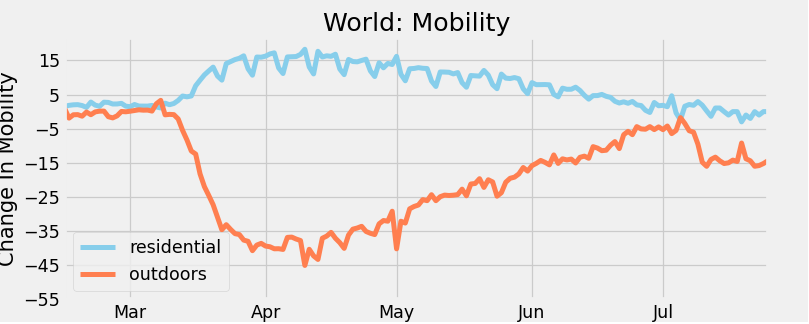

In [49]:
# plot change in mobility for the world
worldGraph_df = world[['date','residential','outdoors']]
worldGraph_df.set_index(['date'], inplace=True)

# plot df using fiveThirtyEight style
color_scheme = ["skyblue", "coral", "gold","green"]

plt.style.use('fivethirtyeight')

ax = worldGraph_df.plot(figsize=(10,4), color=color_scheme)

ax.set_title("World: Mobility")
ax.set_ylabel("Change In Mobility")
ax.set_yticks(np.arange(-55, 25, step=10))
ax.legend(mode="Expanded")

plt.show()

<IPython.core.display.Javascript object>


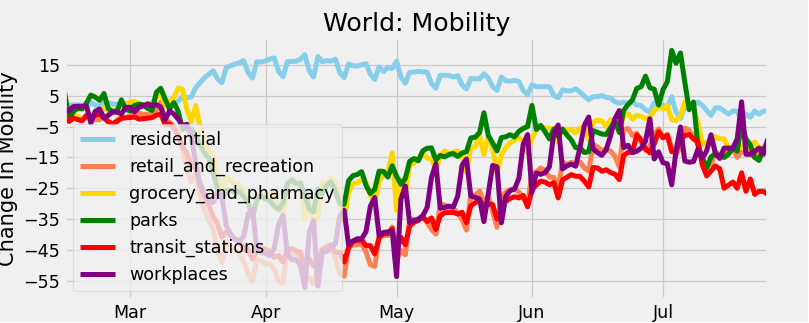

In [50]:
# plot change in mobility for the world (break up outdoors into different categories)
worldGraph_df = world[['date','residential','retail_and_recreation', 'grocery_and_pharmacy',
       'parks', 'transit_stations', 'workplaces']]
worldGraph_df.set_index(['date'], inplace=True)

# plot df using fiveThirtyEight style
color_scheme = ["skyblue", "coral", "gold","green",'red','purple']

plt.style.use('fivethirtyeight')

ax = worldGraph_df.plot(figsize=(10,4), color=color_scheme)

ax.set_title("World: Mobility")
ax.set_ylabel("Change In Mobility")
ax.set_yticks(np.arange(-55, 25, step=10))
ax.legend(mode="Expanded")

plt.show()